## Installation des packages

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np 
import scipy.stats as st
import pandas as pd

python -m jupyter nbconvert --to script TP_SRE.ipynb \\
√† lancer pour convertir le markdoown en python (pour lancer le dash)

## Importation des donn√©es

In [3]:
def telecharger_donnees(ticker, start_date="1900-01-01"):
    """
    T√©l√©charge les donn√©es boursi√®res pour un ticker donn√© depuis Yahoo Finance.

    Param√®tres :
    - ticker (str) : Le symbole boursier (ex: "^FCHI" pour le CAC 40).
    - start_date (str) : La date de d√©but au format "YYYY-MM-DD".

    Retourne :
    - Un DataFrame contenant les donn√©es boursi√®res.
    """
    data = yf.download(ticker, start=start_date)
    df = pd.DataFrame()
    df['Close'] = pd.DataFrame(data['Close'])
    df['log_returns'] = np.log(df['Close'] / df['Close'].shift(1))
    return df


def main():

    df = telecharger_donnees("^FCHI", "2000-01-01")
    print(df.head()) 

if __name__ == "__main__":
    main()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

                  Close  log_returns
Date                                
2000-01-03  5917.370117          NaN
2000-01-04  5672.020020    -0.042347
2000-01-05  5479.700195    -0.034495
2000-01-06  5450.109863    -0.005415
2000-01-07  5539.609863     0.016288


## D√©coupage apprentissage/test

Apprentissage : 15 octobre 2008 -26 juillet 2022 \\
Test : 27 juillet 2022 - 11 juin 2024

Histoire des taux avec la BCE
p√©riode de test : augmentation des taux

In [4]:
def split_train_test(df, train_start_date, train_end_date, test_start_date, test_end_date):
    """
    Divise les donn√©es en ensembles d'apprentissage et de test en fonction des dates sp√©cifi√©es.

    Param√®tres :
    - df : Le DataFrame contenant les donn√©es boursi√®res (avec un index de dates).
    - train_start_date : La date de d√©but de l'ensemble d'apprentissage (format "YYYY-MM-DD").
    - train_end_date : La date de fin de l'ensemble d'apprentissage (format "YYYY-MM-DD").
    - test_start_date : La date de d√©but de l'ensemble de test (format "YYYY-MM-DD").
    - test_end_date : La date de fin de l'ensemble de test (format "YYYY-MM-DD").

    Retourne :
    - df_train : L'ensemble d'apprentissage.
    - df_test : L'ensemble de test.
    """
    # D√©coupage des donn√©es en fonction des dates
    df_train = df[(df.index >= train_start_date) & (df.index <= train_end_date)]
    df_test = df[(df.index >= test_start_date) & (df.index <= test_end_date)]

    return df_train, df_test

if __name__ == "__main__":
    # Charger les donn√©es
    df = telecharger_donnees("^FCHI", "2000-01-01")
    # Effectuer la division train/test
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")

    # V√©rification
    print(f"Train data shape: {df_train.shape}")
    print(f"Test data shape: {df_test.shape}")


[*********************100%***********************]  1 of 1 completed

Train data shape: (3523, 2)
Test data shape: (480, 2)


## Statistiques descriptives sur les 2 jeux de donn√©es

[*********************100%***********************]  1 of 1 completed


Statistiques descriptives du jeu de donn√©es d'apprentissage :
             Close  log_returns
count  3523.000000  3523.000000
mean   4601.299644     0.000153
std    1022.270616     0.013953
min    2519.290039    -0.130983
25%    3798.179932    -0.006099
50%    4463.000000     0.000580
75%    5318.609863     0.006855
max    7376.370117     0.096169

Statistiques descriptives du jeu de donn√©es de test :
             Close  log_returns
count   480.000000   480.000000
mean   7180.258167     0.000472
std     588.624058     0.008826
min    5676.870117    -0.036484
25%    6858.330200    -0.004104
50%    7260.850098     0.000760
75%    7491.614990     0.005526
max    8239.990234     0.041504


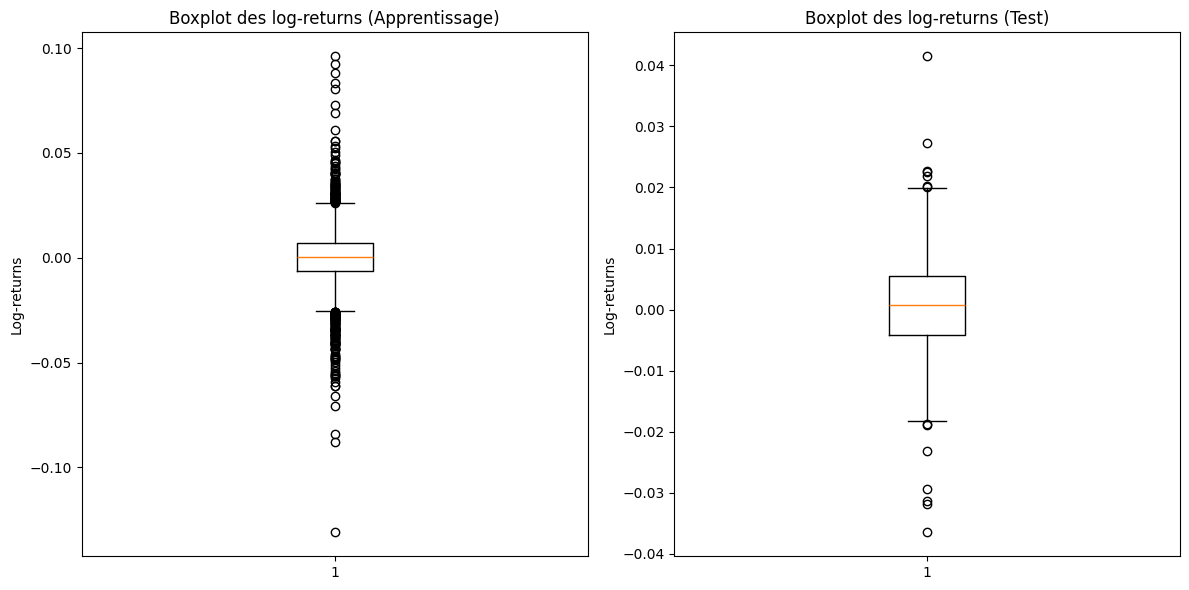

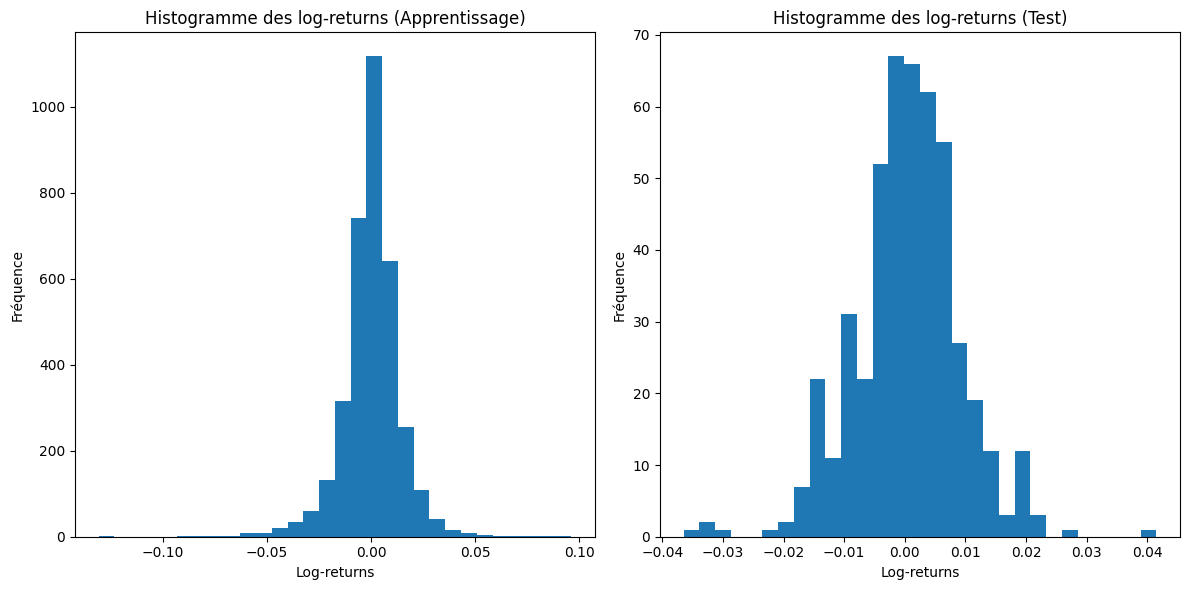

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_train_test_data(df_train, df_test):
    """
    Analyse les jeux de donn√©es d'apprentissage et de test :
    - Affiche les statistiques descriptives
    - G√©n√®re des boxplots des log-returns
    - G√©n√®re des histogrammes des log-returns

    Param√®tres :
    - df_train : DataFrame du jeu de donn√©es d'apprentissage
    - df_test : DataFrame du jeu de donn√©es de test
    """

    # Statistiques descriptives
    print("Statistiques descriptives du jeu de donn√©es d'apprentissage :")
    print(df_train.describe())
    print("\nStatistiques descriptives du jeu de donn√©es de test :")
    print(df_test.describe())

    # Boxplots des log-returns
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.boxplot(df_train['log_returns'].dropna())  
    plt.title("Boxplot des log-returns (Apprentissage)")
    plt.ylabel("Log-returns")

    plt.subplot(1, 2, 2)
    plt.boxplot(df_test['log_returns'].dropna())  
    plt.title("Boxplot des log-returns (Test)")
    plt.ylabel("Log-returns")

    plt.tight_layout()
    plt.show()

    # Histogrammes des log-returns
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(df_train['log_returns'].dropna(), bins=30)
    plt.title("Histogramme des log-returns (Apprentissage)")
    plt.xlabel("Log-returns")
    plt.ylabel("Fr√©quence")

    plt.subplot(1, 2, 2)
    plt.hist(df_test['log_returns'].dropna(), bins=30)
    plt.title("Histogramme des log-returns (Test)")
    plt.xlabel("Log-returns")
    plt.ylabel("Fr√©quence")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Charger les donn√©es
    df = telecharger_donnees("^FCHI", "2000-01-01")

    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")

    # Analyse
    analyze_train_test_data(df_train, df_test)


## Graphique superposant les 2

On cherche ici √† superoser le log-rendement et le prix de cl√¥ture sur un m√™me graphique

In [7]:
import plotly.graph_objects as go
import pandas as pd

def plot_dual_axis_graph(df, ticker, train_start_date, train_end_date, test_start_date, test_end_date):
    """
    G√©n√®re un graphique Plotly avec deux axes Y :
    - Log-rendements en rouge (axe de gauche)
    - Prix de cl√¥ture en bleu (axe de droite)
    Le graphique est limit√© aux p√©riodes entre le d√©but du train et la fin du test.
    Des lignes pointill√©es indiquent les fronti√®res des p√©riodes d'entra√Ænement et de test.

    Args:
        df (pd.DataFrame): Donn√©es avec 'Close' et 'log_returns'
        ticker (str): Symbole boursier
        train_start_date (str): Date de d√©but de l'ensemble d'entra√Ænement
        train_end_date (str): Date de fin de l'ensemble d'entra√Ænement
        test_start_date (str): Date de d√©but de l'ensemble de test
        test_end_date (str): Date de fin de l'ensemble de test
        
    Returns:
        fig (plotly.graph_objects.Figure): Graphique interactif
    """
    # Limiter le DataFrame aux dates d'entra√Ænement et de test
    df_filtered = df[(df.index >= train_start_date) & (df.index <= test_end_date)]

    fig = go.Figure()

    # Log-rendements (rouge)
    fig.add_trace(go.Scatter(
        x=df_filtered.index, 
        y=df_filtered['log_returns'], 
        mode='lines', 
        name='Log-rendements', 
        line=dict(color='red')
    ))

    # Prix de cl√¥ture (bleu)
    fig.add_trace(go.Scatter(
        x=df_filtered.index, 
        y=df_filtered['Close'], 
        mode='lines', 
        name='Prix de cl√¥ture', 
        line=dict(color='blue'),
        yaxis="y2"
    ))

    # Ajouter des lignes pointill√©es pour les fronti√®res des p√©riodes
    fig.add_trace(go.Scatter(
        x=[train_start_date, train_start_date],
        y=[df_filtered['log_returns'].min(), df_filtered['log_returns'].max()],
        mode='lines',
        name='D√©but Train',
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=[train_end_date, train_end_date],
        y=[df_filtered['log_returns'].min(), df_filtered['log_returns'].max()],
        mode='lines',
        name='Fin Train',
        line=dict(color='red', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=[test_start_date, test_start_date],
        y=[df_filtered['log_returns'].min(), df_filtered['log_returns'].max()],
        mode='lines',
        name='D√©but Test',
        line=dict(color='green', dash='dash')
    ))

    fig.add_trace(go.Scatter(
        x=[test_end_date, test_end_date],
        y=[df_filtered['log_returns'].min(), df_filtered['log_returns'].max()],
        mode='lines',
        name='Fin Test',
        line=dict(color='green', dash='dash')
    ))

    # Mise en forme des axes
    fig.update_layout(
        title=f"Log-rendements et Prix de cl√¥ture de {ticker}",
        xaxis=dict(title="Date"),
        yaxis=dict(title="Log-rendements", color="red"),
        yaxis2=dict(
            title="Prix de cl√¥ture",
            overlaying="y",
            side="right",
            color="blue"
        ),
        template="plotly_white"
    )

    return fig


if __name__ == "__main__":
    import plotly.io as pio

    # T√©l√©charger les donn√©es du CAC 40 pour tester
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')

    # D√©finir les dates pour l'ensemble de train et de test
    train_start_date = "2008-10-15"
    train_end_date = "2022-07-26"
    test_start_date = "2022-07-27"
    test_end_date = "2024-06-11"

    # G√©n√©rer le graphique
    fig = plot_dual_axis_graph(df, "^FCHI", train_start_date, train_end_date, test_start_date, test_end_date)

    # Afficher le graphique
    fig.show()  # Ouvre le graphique dans le navigateur ou l'affiche en ligne


# 1.VaR non param√©trique

## Question a.

Ecrire une fonction calculant la VaR historique (√† 1 jour) d'un ensemble de log-rendements ==> VaR_Hist(x, alpha)

In [8]:
import numpy as np

def VaR_Hist(x, alpha):
    """
    Calcule la VaR historique (√† 1 jour) d'un ensemble de log-rendements en utilisant np.percentile.

    Args:
        x: Une s√©rie Pandas de log-rendements.
        alpha: Le niveau de confiance (ex: 0.95 pour 95%).

    Returns:
        La VaR historique.
    """

    # Convertit alpha en pourcentage pour np.percentile
    percentile = (1 - alpha) * 100

    # Calcule la VaR avec np.percentile
    return np.percentile(x.dropna(), percentile)

## Question b

Calculer la VaR historique sur base d'apprentissage pour alpha=99%

In [ ]:
if __name__ == "__main__":
    # Charger les donn√©es
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')

    # D√©coupage en train et test
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")

    # Calcul de la VaR historique
    alpha = 0.99
    var_train = VaR_Hist(df_train['log_returns'], alpha)

    print(f"VaR historique (niveau de confiance {alpha*100:.0f}%) sur les donn√©es d'apprentissage : {var_train*100}%")

VaR historique (niveau de confiance 99%) sur les donn√©es d'apprentissage : -0.04085030859377692


## Question c

Ecrire une fonction calculant la VaR historique bootstrap d'un ensemble de log-rendements et donnant un IC de niveau alpha_IC de cette VaR (VaR_Hist_Bootstrap(x,alpha, B, alpha_IC) )

In [10]:
def VaR_Hist_Bootstrap(x, alpha, B, alpha_IC):
    """
    Calcule la VaR historique bootstrap d'un ensemble de log-rendements et donne un intervalle de confiance.

    Args:
        x: Une s√©rie Pandas de log-rendements.
        alpha: Le niveau de confiance pour la VaR (par exemple, 0.95 pour un niveau de confiance de 95%).
        B: Le nombre de r√©√©chantillonages bootstrap.
        alpha_IC: Le niveau de confiance pour l'intervalle de confiance (par exemple, 0.95 pour un intervalle de confiance de 95%).

    Returns:
        Un tuple contenant la VaR historique bootstrap, la borne inf√©rieure de l'intervalle de confiance, et la borne sup√©rieure de l'intervalle de confiance.
    """

    var_bootstrap = []
    for _ in range(B):
        # √âchantillonnage bootstrap avec remise
        x_bootstrap = x.sample(n=len(x), replace=True)

        # Calcul de la VaR historique pour l'√©chantillon bootstrap
        var_bootstrap.append(VaR_Hist(x_bootstrap, alpha))

    # Calcul de la VaR bootstrap (moyenne des VaR des √©chantillons bootstrap)
    var_hist_bootstrap = np.mean(var_bootstrap)

    # Calcul de l'intervalle de confiance
    lower_bound = np.percentile(var_bootstrap, (1 - alpha_IC) / 2 * 100)
    upper_bound = np.percentile(var_bootstrap, (1 + alpha_IC) / 2 * 100)

    return var_hist_bootstrap, lower_bound, upper_bound


## Question d

Calculer la VaR historique Bootstrap et l'IC associ√© √† 90% sur base d'apprentissage pour alpha = 99%

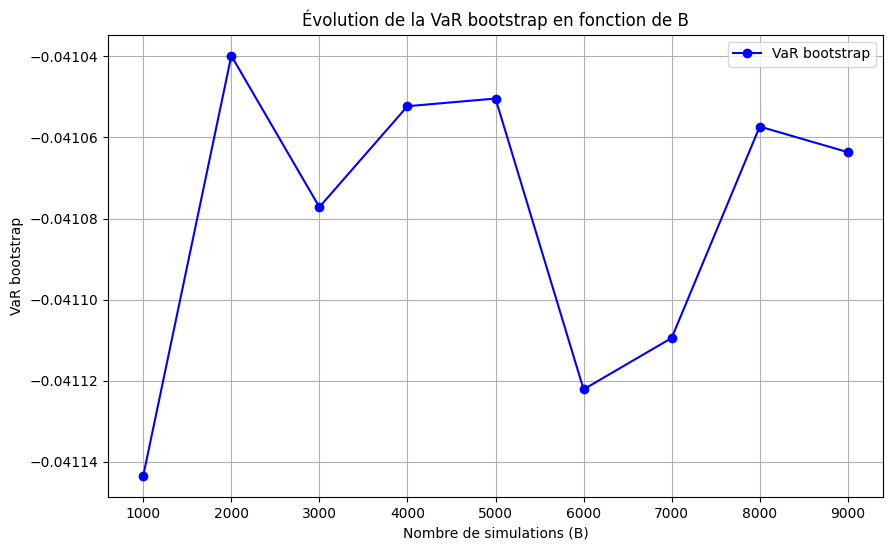

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_var_bootstrap(x, alpha, alpha_IC, B_min=1000, B_max=10000, step=1000):
    """
    Trace l'√©volution de la VaR bootstrap en fonction des valeurs de B.

    Param√®tres :
    - x : Les rendements (s√©rie de donn√©es).
    - alpha : Le niveau de confiance pour la VaR.
    - alpha_IC : Le niveau de confiance pour l'intervalle de confiance.
    - B_min, B_max, step : Les limites et le pas pour les valeurs de B √† tester.
    """
    np.random.seed(42)
    B_values = np.arange(B_min, B_max, step)  # Ex: de 1000 √† 10000 avec un pas de 20
    var_results = []

    # Calcul de la VaR bootstrap pour chaque valeur de B
    for B in B_values:
        var_bootstrap, _, _ = VaR_Hist_Bootstrap(x, alpha, B, alpha_IC)
        var_results.append(var_bootstrap)

    # Tracer l'√©volution de la VaR bootstrap avec des points
    plt.figure(figsize=(10, 6))
    plt.plot(B_values, var_results, label="VaR bootstrap", marker='o', markersize=6, linestyle='-', color='blue')  # Ajout des points
    plt.xlabel("Nombre de simulations (B)")
    plt.ylabel("VaR bootstrap")
    plt.title("√âvolution de la VaR bootstrap en fonction de B")
    plt.grid(True)
    plt.legend()
    plt.show()


if __name__ == "__main__":
    # Charger les donn√©es
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')

    # D√©coupage en train et test
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")

    # Tracer l'√©volution de la VaR bootstrap
    plot_var_bootstrap(df_train['log_returns'], alpha=0.99, alpha_IC=0.90)

In [59]:
if __name__ == "__main__":
    # Charger les donn√©es
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')

    # D√©coupage en train et test
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")

    # S√©lection manuelle de B optimal
    optimal_B = 8000  # Ajuster en fonction du graphique

    # Calcul final avec le B optimal s√©lectionn√©
    var_hist_bootstrap, lower_bound, upper_bound = VaR_Hist_Bootstrap(
        df_train['log_returns'], alpha=0.99, B=optimal_B, alpha_IC=0.90
    )

    # Affichage des r√©sultats
    print(f"VaR historique bootstrap (niveau de confiance de 99%) : {var_hist_bootstrap*100}%")
    print(f"Intervalle de confiance √† 90% : [{lower_bound*100}%, {upper_bound*100}%]")


VaR historique bootstrap (niveau de confiance de 99%) : -4.110347974319898%
Intervalle de confiance √† 90% : [-4.385334557770063%, -3.8345997285531395%]


## Question e

Calculer le nombre d'exceptions sur la base de test associ√©es √† la VaR historique calcul√©e en 1.b

In [13]:
def count_var_exceptions(df_test, var_value):
    """
    Compte le nombre d'exceptions o√π les log-rendements sont inf√©rieurs √† la VaR.

    Param√®tres :
    - df_test : DataFrame contenant les rendements de test.
    - var_value : Valeur de la VaR calcul√©e.

    Retourne :
    - Nombre d'exceptions.
    """
    exceptions = df_test[df_test['log_returns'] < var_value]
    return len(exceptions)

if __name__ == "__main__":
    # Charger les donn√©es
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')

    # D√©coupage en train et test
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")

    # Calcul de la VaR sur les donn√©es d'apprentissage
    alpha = 0.99
    var_train = VaR_Hist(df_train['log_returns'], alpha)

    # Calcul des exceptions sur la p√©riode de test
    nb_exceptions = count_var_exceptions(df_test, var_train)

    # Affichage du r√©sultat
    print(f"Nombre d'exceptions sur la p√©riode de test : {nb_exceptions}")


Nombre d'exceptions sur la p√©riode de test : 0


R√©sultat ok (voir l'histogramme sur l'ensemble test)

## Question f

Comparer statistiquement ce % d'exceptions avec le niveau de risque attendu (aide : on pourra par exemple passer par un IC de binomiale)


In [14]:
'''import scipy.stats as st

# Niveau de confiance pour l'intervalle de confiance de la proportion d'exceptions
alpha_IC_binomiale = 0.95

# Nombre d'observations dans le jeu de test
n = len(df_test)

# Niveau de risque attendu (1 - alpha)
niveau_risque_attendu = 1 - alpha

# Nombre d'exceptions observ√©es
k = nb_exceptions

# Calcul de l'intervalle de confiance de la proportion d'exceptions
intervalle_confiance = st.binom.interval(alpha_IC_binomiale, n, niveau_risque_attendu)

# Affichage de l'intervalle de confiance
print(f"Intervalle de confiance √† {alpha_IC_binomiale*100:.0f}% pour la proportion d'exceptions : [{intervalle_confiance[0]/n}, {intervalle_confiance[1]/n}]")
'''

'import scipy.stats as st\n\n# Niveau de confiance pour l\'intervalle de confiance de la proportion d\'exceptions\nalpha_IC_binomiale = 0.95\n\n# Nombre d\'observations dans le jeu de test\nn = len(df_test)\n\n# Niveau de risque attendu (1 - alpha)\nniveau_risque_attendu = 1 - alpha\n\n# Nombre d\'exceptions observ√©es\nk = nb_exceptions\n\n# Calcul de l\'intervalle de confiance de la proportion d\'exceptions\nintervalle_confiance = st.binom.interval(alpha_IC_binomiale, n, niveau_risque_attendu)\n\n# Affichage de l\'intervalle de confiance\nprint(f"Intervalle de confiance √† {alpha_IC_binomiale*100:.0f}% pour la proportion d\'exceptions : [{intervalle_confiance[0]/n}, {intervalle_confiance[1]/n}]")\n'

# 2.VaR gaussienne

## Question a

a.	Ecrire une fonction calculant la VaR gaussienne d‚Äôun ensemble de log-rendements (VaR_Gauss(x, alpha) )

In [15]:
def VaR_Gauss(x, alpha):
    """
    Calcule la VaR gaussienne (√† 1 jour) d'un ensemble de log-rendements.

    Args:
        x: Une s√©rie Pandas de log-rendements.
        alpha: Le niveau de confiance (ex: 0.99 pour 99%).

    Returns:
        La VaR gaussienne.
    """
    # Calculer la moyenne et l'√©cart-type des log-rendements
    mu = np.mean(x.dropna())
    sigma = np.std(x.dropna())

    # Calculer le quantile correspondant au niveau de confiance alpha
    quantile = st.norm.ppf(1 - alpha)

    # Calculer la VaR gaussienne
    var_gauss = mu + sigma * quantile
    return var_gauss

## Question b

Calculer la VaR gaussienne sur base d‚Äôapprentissage pour alpha = 99%.

In [60]:
if __name__ == "__main__":
    # Charger les donn√©es
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')

    # D√©coupage en train et test
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")

    # Calcul de la VaR gaussienne sur les donn√©es d'apprentissage
    alpha = 0.99
    var_gauss_train = VaR_Gauss(df_train['log_returns'], alpha)

    # Affichage du r√©sultat
    print(f"VaR gaussienne (niveau de confiance de {alpha*100:.0f}%) sur les donn√©es d'apprentissage : {var_gauss_train*100}%")

VaR gaussienne (niveau de confiance de 99%) sur les donn√©es d'apprentissage : -3.2301974025146105%


## Question c

Faire une validation ex-ante (analyses graphiques, QQ-plot, etc.)

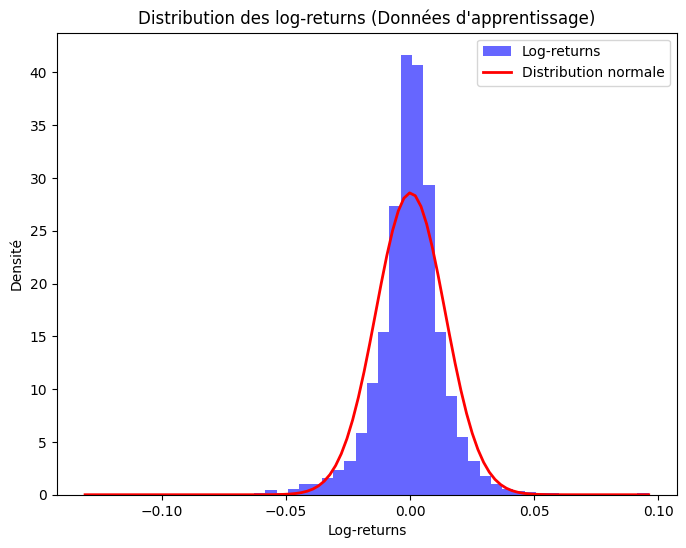

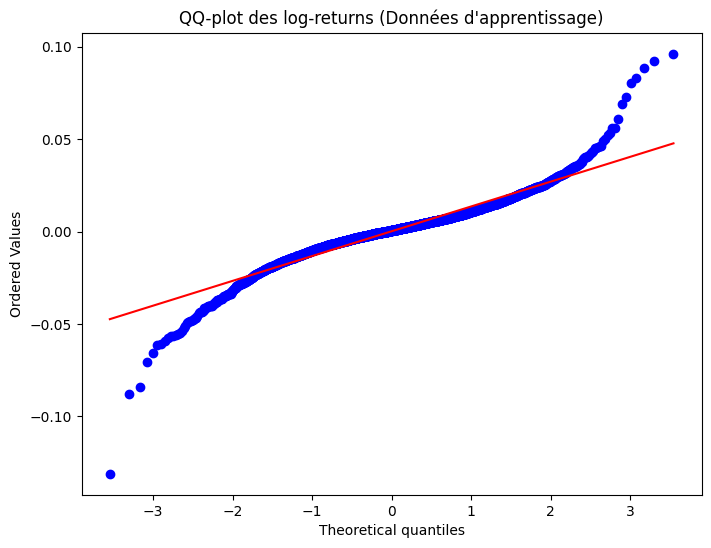

Test de Shapiro-Wilk: Statistique = 0.924, p-valeur = 0.000
On rejette l'hypoth√®se nulle: les donn√©es ne suivent pas une loi normale.


In [17]:
def analyze_log_returns(df_train):
    """
    Analyse graphique et statistique des log-returns :
    - Histogramme avec superposition de la loi normale
    - QQ-plot pour v√©rifier la normalit√©
    - Test de Shapiro-Wilk pour la normalit√©

    Args:
        df_train (pd.DataFrame): Donn√©es d'apprentissage avec colonne 'log_returns'
    """
    log_returns = df_train['log_returns'].dropna()

    # Histogramme avec densit√© normale
    plt.figure(figsize=(8, 6))
    plt.hist(log_returns, bins=50, density=True, alpha=0.6, color='b', label='Log-returns')
    plt.title('Distribution des log-returns (Donn√©es d\'apprentissage)')
    plt.xlabel('Log-returns')
    plt.ylabel('Densit√©')

    # Superposition de la loi normale
    mu, sigma = np.mean(log_returns), np.std(log_returns)
    x = np.linspace(min(log_returns), max(log_returns), 100)
    plt.plot(x, st.norm.pdf(x, mu, sigma), 'r-', lw=2, label='Distribution normale')
    plt.legend()
    plt.show()

    # QQ-plot
    plt.figure(figsize=(8, 6))
    st.probplot(log_returns, dist="norm", plot=plt)
    plt.title('QQ-plot des log-returns (Donn√©es d\'apprentissage)')
    plt.show()

    # Test de Shapiro-Wilk
    shapiro_test = st.shapiro(log_returns)
    print(f"Test de Shapiro-Wilk: Statistique = {shapiro_test[0]:.3f}, p-valeur = {shapiro_test[1]:.3f}")

    # Interpr√©tation du test
    alpha_test = 0.05  # Seuil de signification
    if shapiro_test[1] < alpha_test:
        print("On rejette l'hypoth√®se nulle: les donn√©es ne suivent pas une loi normale.")
    else:
        print("On ne rejette pas l'hypoth√®se nulle: les donn√©es pourraient suivre une loi normale.")

if __name__ == "__main__":
    # Charger les donn√©es
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')

    # D√©coupage en train/test
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")

    # Lancer l'analyse
    analyze_log_returns(df_train)

## Question d
Calculer la VaR gaussienne √† 10j par la m√©thode du scaling

In [ ]:
def VaR_Gauss_Scaling(var_gauss_1d, horizon=10):
    """
    Calcule la VaR gaussienne √† un horizon de plusieurs jours en utilisant la m√©thode de scaling.

    Args:
        var_gauss_1d (float): VaR gaussienne √† 1 jour.
        horizon (int): Nombre de jours pour la VaR (par d√©faut 10 jours).

    Returns:
        float: VaR gaussienne √† l'horizon donn√©.
    """
    return np.sqrt(horizon) * var_gauss_1d

if __name__ == "__main__":
    # Charger les donn√©es
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')

    # D√©coupage en train/test
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")

    # Calcul de la VaR gaussienne √† 1 jour
    alpha = 0.99
    var_gauss_train = VaR_Gauss(df_train['log_returns'], alpha)

    # Calcul de la VaR gaussienne √† 10 jours avec scaling
    var_gauss_10d = VaR_Gauss_Scaling(var_gauss_train, horizon=10)

    # Affichage des r√©sultats
    print(f"VaR gaussienne √† 1 jour (niveau de confiance {alpha*100:.0f}%) : {var_gauss_train*100}%")
    print(f"VaR gaussienne √† 10 jours (niveau de confiance {alpha*100:.0f}%) : {var_gauss_10d*100}%")


VaR gaussienne √† 1 jour (niveau de confiance 99%) : -0.032301974025146105
VaR gaussienne √† 10 jours (niveau de confiance 99%) : -0.1021478108390588


## Question e

Calculer la VaR gaussienne √† 10j par m√©thode de diffusion d‚Äôun actif.
dS=S.Œº.dt + S.œÉ.Z.‚àödt       avec     Z ~N(0,1)
On pourra consid√©rer :


*   S_0 comme la valeur du cours de cl√¥ture √† la derni√®re date de l'√©chantillon d'apprentissage
*   dt=1jour
*   Œº et œÉ les param√®tres estim√©s en 2.b

In [ ]:
def VaR_Gauss_Diffusion(S_0, mu, sigma, alpha, horizon=10, dt=1):
    """
    Calcule la VaR gaussienne √† plusieurs jours en utilisant la m√©thode de diffusion.

    Args:
        S_0 (float): Dernier prix observ√©.
        mu (float): Esp√©rance des log-rendements.
        sigma (float): Volatilit√© des log-rendements.
        alpha (float): Niveau de confiance (ex: 0.99 pour 99%).
        horizon (int): Nombre de jours pour la VaR (par d√©faut 10 jours).
        dt (float): Pas de temps (1 jour par d√©faut).

    Returns:
        float: VaR gaussienne par diffusion.
    """
    quantile_alpha = st.norm.ppf(1 - alpha)
    var_diffusion = np.exp((mu - 0.5 * sigma**2) * horizon * dt + sigma * np.sqrt(horizon * dt) * quantile_alpha) - 1
    return var_diffusion

if __name__ == "__main__":
    # Charger les donn√©es
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')

    # D√©coupage en train/test
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")

    # R√©cup√©ration des param√®tres
    S_0 = df_train['Close'].iloc[-1]
    mu = np.mean(df_train['log_returns'].dropna())
    sigma = np.std(df_train['log_returns'].dropna())
    alpha = 0.99
    horizon = 10

    # Calcul de la VaR par diffusion
    var_diffusion_10d = VaR_Gauss_Diffusion(S_0, mu, sigma, alpha, horizon)

    # Affichage des r√©sultats
    print(f"VaR gaussienne √† {horizon} jours (diffusion) : {var_diffusion_10d*100}%")


VaR gaussienne √† 10 jours (diffusion) : -0.09704050767925854


## Question f

In [ ]:
import numpy as np
from scipy.stats import norm

def compute_EWMA_params(returns, lambd):
    """
    Calcule la moyenne et la variance pond√©r√©es EWMA.

    Param√®tres :
        returns : np.array
            S√©rie des rendements pass√©s
        lambd : float
            Facteur d'lissage EWMA (ex: 0.94, 0.95, 0.99)

    Retour :
        mu_lambda : float
            Moyenne pond√©r√©e EWMA
        sigma_lambda : float
            √âcart-type pond√©r√© EWMA
    """
    T = len(returns)  # Taille de l'historique
    weights = np.array([(lambd**i) * (1 - lambd) for i in range(T)])  # Poids EWMA
    weights /= np.sum(weights)  # Normalisation des poids

    # Calcul de la moyenne pond√©r√©e exponentielle
    mu_ewma = np.sum(weights * returns[::-1])

    # Calcul de la variance pond√©r√©e exponentielle
    sigma_ewma = np.sqrt(np.sum(weights * (returns[::-1] - mu_ewma) ** 2))

    return mu_ewma, sigma_ewma

def VaR_Gauss_EWMA(returns, alpha, lambd):
    """
    Calcule la VaR gaussienne √† 1 jour en utilisant la m√©thode EWMA.

    Param√®tres :
        returns : np.array
            S√©rie des rendements pass√©s
        alpha : float
            Niveau de confiance (ex: 0.99 pour 99%)
        lambd : float
            Facteur d'lissage EWMA (ex: 0.94, 0.95, 0.99)

    Retour :
        VaR : float
            La valeur √† risque (VaR) estim√©e
    """
    mu_lambda, sigma_lambda = compute_EWMA_params(returns, lambd)
    VaR = mu_lambda + norm.ppf(alpha) * sigma_lambda  # Int√©gration de la moyenne EWMA
    return VaR


## Question g

In [61]:
def main():
    # Charger les donn√©es
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')

    # D√©coupage en train/test
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")

    # D√©finition des param√®tres
    lambdas = [0.9, 0.95, 0.99]
    alpha = 0.01  # Pour alpha = 99%, on utilise 0.01

    for lambd in lambdas:
        # i. Calculer les param√®tres ùúáÃÇ(ùúÜ) et ùúéÃÇ2(ùúÜ)
        mu_lambda, sigma_lambda = compute_EWMA_params(df_train['log_returns'].values, lambd)
        print(f"Pour lambda = {lambd}:")
        print(f"  mu_hat(lambda) = {mu_lambda}")
        print(f"  sigma_hat(lambda) = {sigma_lambda}")

        # ii. Calculer la VaR gaussienne EWMA sur base d‚Äôapprentissage
        var_ewma = VaR_Gauss_EWMA(df_train['log_returns'].values, alpha, lambd)
        print(f"  VaR EWMA (alpha = {alpha}) = {var_ewma*100}%")

        # iii. Calculer le nombre d‚Äôexceptions sur base de test
        exceptions = df_test[df_test['log_returns'] < var_ewma]
        nb_exceptions = len(exceptions)
        print(f"  Nombre d'exceptions sur la p√©riode de test : {nb_exceptions}")
        print("-" * 20)

if __name__ == "__main__":
    main()


Pour lambda = 0.9:
  mu_hat(lambda) = 0.0018981356545824813
  sigma_hat(lambda) = 0.011025314975193582
  VaR EWMA (alpha = 0.01) = -2.3750582398589755%
  Nombre d'exceptions sur la p√©riode de test : 4
--------------------
Pour lambda = 0.95:
  mu_hat(lambda) = 0.0007351462996445099
  sigma_hat(lambda) = 0.012768499218598014
  VaR EWMA (alpha = 0.01) = -2.8968824712233117%
  Nombre d'exceptions sur la p√©riode de test : 4
--------------------
Pour lambda = 0.99:
  mu_hat(lambda) = -0.00032061667697471074
  sigma_hat(lambda) = 0.014267240661065782
  VaR EWMA (alpha = 0.01) = -3.351118165727413%
  Nombre d'exceptions sur la p√©riode de test : 1
--------------------


# 3.VaR skew-Student


## Question a

Ecrire une fonction permettant d‚Äôestimer les param√®tres d‚Äôune loi de Skew Student par maximum de vraisemblance.

On proc√©dera par √©tapes : fonction de densit√©, fonction de log-vraisemblance, fonction d‚Äôoptimisation.

On pourra utiliser le package scipy.optimize et la fonction minimize.

### Fonction de densit√©

In [63]:
from scipy.stats import t

def skew_student_pdf(x, mu, sigma, gamma, nu):
    """
    Fonction de densit√© de probabilit√© de la loi skew-Student.
    """
    z = (x - mu)/sigma
    # Calcul de la fonction de densit√© de la loi Student g√©n√©ralis√©e
    pdf_student = t.pdf(z, df=nu) / sigma  #t.pdf(x, df, loc, scale) is identically equivalent to t.pdf(y, df) / scale with y = (x - loc) / scale

    # Calcul de la fonction de r√©partition de la loi Student (nu + 1 degr√©s de libert√©)
    cdf_student = st.t.cdf(gamma *z*np.sqrt((nu + 1)/(nu + z**2)), df=nu + 1)

    # Fonction de densit√© de la loi skew-Student
    pdf_skew_student = 2 * pdf_student * cdf_student

    return pdf_skew_student

### Fonction de log-vraisemblance

In [64]:
def log_likelihood_skew_student(params, x):
    """
    Fonction de log-vraisemblance pour la loi skew-student.
    """
    mu, sigma, gamma, nu = params

    # V√©rification des contraintes sur les param√®tres
    if sigma <= 0 or nu <= 0:
        return -np.inf  # Retourne -infini si les contraintes ne sont pas respect√©es

    log_likelihood = np.sum(np.log(skew_student_pdf(x, mu, sigma, gamma, nu)))
    return -log_likelihood  # On retourne l'oppos√© pour la minimisation

### Fonction d'optimisation

In [65]:
from scipy.optimize import minimize

def estimate_skew_student_params(x):
    """
    Estime les param√®tres d'une loi skew-Student par maximum de vraisemblance.
    """

    # Initialisation des param√®tres
    initial_params = [np.mean(x), np.std(x), 0, 5]  # Valeurs initiales pour mu, sigma, gamma, nu

    # Bornes des param√®tres
    bounds = [(None, None), (1e-6, None), (None, None), (1e-6, None)] # sigma > 0, nu > 0

    # Optimisation
    result = minimize(log_likelihood_skew_student, initial_params, args=(x,), bounds=bounds)

    # V√©rification de la convergence
    if not result.success:
        print(f"Optimization failed: {result.message}")
        return None

    return result.x

## Question b

Estimer les param√®tres de loi Skew Student sur base d‚Äôapprentissage.

In [66]:
def main():
    # Charger les donn√©es
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')

    # D√©coupage en train/test
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")

    # Estimation des param√®tres de la loi Skew-Student sur les donn√©es d'apprentissage
    estimated_params = estimate_skew_student_params(df_train['log_returns'].dropna())

    if estimated_params is not None:
        mu_hat, sigma_hat, gamma_hat, nu_hat = estimated_params
        print(f"Param√®tres estim√©s de la loi Skew-Student :")
        print(f"  mu_hat = {mu_hat}")
        print(f"  sigma_hat = {sigma_hat}")
        print(f"  gamma_hat = {gamma_hat}")
        print(f"  nu_hat = {nu_hat}")
    else:
        print("L'optimisation a √©chou√©. V√©rifiez les donn√©es ou les param√®tres initiaux.")

if __name__ == "__main__":
    main()


Param√®tres estim√©s de la loi Skew-Student :
  mu_hat = 0.002324665993313714
  sigma_hat = 0.008823907155806717
  gamma_hat = -0.2318222186309979
  nu_hat = 2.96188487460101


## Question c
Faire une validation ex-ante par QQ-plot.

In [67]:
import numpy as np
import scipy.integrate as spi
import scipy.optimize as spo

def inverse_cdf(var, p):
    """
    Trouve la valeur x telle que F(x) = p pour une distribution Skew-Student
    bas√©e sur les param√®tres estim√©s √† partir des rendements var.

    Param√®tres :
    - var : Une s√©rie de donn√©es (par exemple les rendements des actifs)
    - p : La probabilit√© √† laquelle on veut inverser la CDF (entre 0 et 1)

    Retourne :
    - La valeur de x telle que F(x) = p
    """
    # Estimation des param√®tres de la loi Skew-Student √† partir des donn√©es var
    estimated_params = estimate_skew_student_params(var)

    if estimated_params is not None:
        mu_hat, sigma_hat, gamma_hat, nu_hat = estimated_params

        # Fonction de la CDF (int√©grale de la PDF)
        def cdf(x):
            return spi.quad(lambda t: skew_student_pdf(t, mu_hat, sigma_hat, gamma_hat, nu_hat), -np.inf, x)[0]

        # V√©rification que p est entre 0 et 1
        if not (0 < p < 1):
            raise ValueError("p doit √™tre entre 0 et 1")

        # Trouver la valeur de x telle que F(x) = p
        return spo.root_scalar(lambda x: cdf(x) - p, bracket=[-5, 10]).root
    else:
        raise ValueError("Les param√®tres estim√©s sont None.")

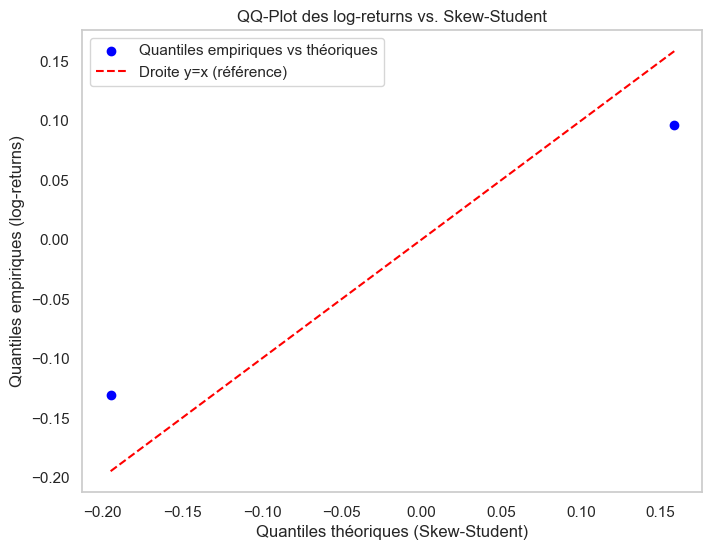

In [68]:
import scipy.integrate as spi
import scipy.optimize as spo


def plot_qq_skew_student(df_train):
    """
    Trace un QQ-Plot des log-returns par rapport √† la loi Skew-Student estim√©e.

    Param√®tres :
    - df_train : pd.DataFrame
        Les donn√©es d'entra√Ænement, avec une colonne 'log_returns' contenant les rendements log.
    """
    # Extraire les donn√©es sans NaN
    log_returns = np.sort(df_train['log_returns'].dropna().values)
    n = len(log_returns)

    # Indices pour extraire des quantiles empiriques
    indices = np.linspace(0, len(log_returns) - 1, 2, dtype=int)
    quantiles_empiriques = log_returns[indices]

    # Calculer les probabilit√©s associ√©es aux quantiles empiriques
    p_vals = (indices + 0.5) / len(log_returns)  # Probabilit√©s associ√©es aux quantiles

    # Calculer les quantiles th√©oriques pour les probabilit√©s donn√©es
    quantiles_theoriques = np.array([inverse_cdf(df_train['log_returns'], p) for p in p_vals])

    # Tracer le QQ-plot
    plt.figure(figsize=(8, 6))
    plt.scatter(quantiles_theoriques, quantiles_empiriques, color="blue", label="Quantiles empiriques vs th√©oriques")
    plt.plot(quantiles_theoriques, quantiles_theoriques, color="red", linestyle="--", label="Droite y=x (r√©f√©rence)")

    plt.xlabel("Quantiles th√©oriques (Skew-Student)")
    plt.ylabel("Quantiles empiriques (log-returns)")
    plt.title("QQ-Plot des log-returns vs. Skew-Student")
    plt.legend()
    plt.grid()
    plt.show()

def main():
    # Charger les donn√©es
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')

    # D√©coupage en train/test
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")

    # Tracer le QQ-Plot
    plot_qq_skew_student(df_train)

if __name__ == "__main__":
    main()

## Question d

Comparer la qualit√© de fit entre loi gaussienne et loi de skew Student par analyse graphique.

Param√®tres estim√©s de la loi Skew-Student :
  mu_hat = 0.002324665993313714
  sigma_hat = 0.008823907155806717
  gamma_hat = -0.2318222186309979
  nu_hat = 2.96188487460101


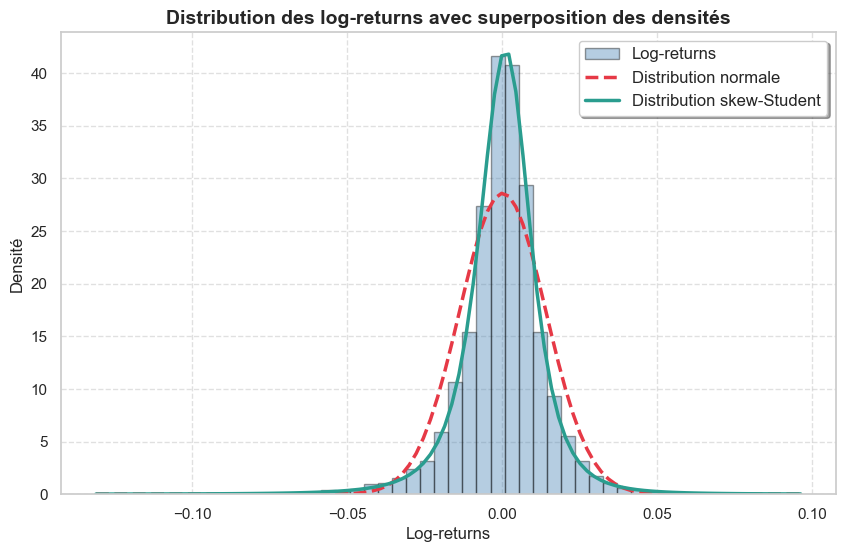

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

def plot_log_returns_distribution(df_train, mu_hat, sigma_hat, gamma_hat, nu_hat):
    """
    Trace l'histogramme des log-returns et superpose les densit√©s de la loi normale et de la loi Skew-Student.

    Param√®tres :
    - df_train : pd.DataFrame
        Les donn√©es d'entra√Ænement contenant une colonne 'log_returns'.
    - mu_hat, sigma_hat, gamma_hat, nu_hat : float
        Param√®tres estim√©s de la distribution Skew-Student.
    """
    # Appliquer un style seaborn
    sns.set(style="whitegrid")

    # Calcul de la moyenne et de l'√©cart-type pour la loi normale
    mu = np.mean(df_train['log_returns'].dropna())
    sigma = np.std(df_train['log_returns'].dropna())

    # D√©finition des valeurs de x pour les courbes de densit√©
    x = np.linspace(min(df_train['log_returns'].dropna()), max(df_train['log_returns'].dropna()), 100)

    # Cr√©ation de la figure
    plt.figure(figsize=(10, 6))

    # Histogramme des log-returns
    plt.hist(df_train['log_returns'].dropna(), bins=50, density=True, alpha=0.4, 
             color='#4682B4', edgecolor='black', label='Log-returns')

    # Superposition de la densit√© normale
    plt.plot(x, st.norm.pdf(x, mu, sigma), color='#E63946', lw=2.5, linestyle='dashed', label='Distribution normale')

    # Superposition de la densit√© skew-student
    plt.plot(x, skew_student_pdf(x, mu_hat, sigma_hat, gamma_hat, nu_hat), color='#2A9D8F', lw=2.5, 
             label='Distribution skew-Student')

    # Ajout de la l√©gende
    plt.legend(frameon=True, shadow=True, fontsize=12)

    # Titres et labels plus lisibles
    plt.title("Distribution des log-returns avec superposition des densit√©s", fontsize=14, fontweight='bold')
    plt.xlabel("Log-returns", fontsize=12)
    plt.ylabel("Densit√©", fontsize=12)

    # Ajout d'une grille subtile
    plt.grid(True, linestyle="--", alpha=0.6)

    # Affichage du graphique
    plt.show()

def main():
    # Charger les donn√©es
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')

    # D√©coupage en train/test
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")

    # Estimation des param√®tres de la loi Skew-Student
    estimated_params = estimate_skew_student_params(df_train['log_returns'].dropna())

    if estimated_params is not None:
        mu_hat, sigma_hat, gamma_hat, nu_hat = estimated_params
        print(f"Param√®tres estim√©s de la loi Skew-Student :")
        print(f"  mu_hat = {mu_hat}")
        print(f"  sigma_hat = {sigma_hat}")
        print(f"  gamma_hat = {gamma_hat}")
        print(f"  nu_hat = {nu_hat}")

        # Tracer la distribution des log-returns avec les densit√©s superpos√©es
        plot_log_returns_distribution(df_train, mu_hat, sigma_hat, gamma_hat, nu_hat)
    else:
        print("L'optimisation a √©chou√©. V√©rifiez les donn√©es ou les param√®tres initiaux.")

if __name__ == "__main__":
    main()


## Question e

Calculer la VaR Skew Student sur base d‚Äôapprentissage pour alpha = 99%.

In [70]:
def calculate_var_student(var, alpha=0.99):
    """
    Calcule la Value at Risk (VaR) bas√©e sur la distribution Skew-Student
    pour un niveau de confiance donn√©.

    Param√®tres :
    - df_train : pd.DataFrame
        Les donn√©es d'entra√Ænement contenant une colonne 'log_returns'.
    - alpha : float (par d√©faut 0.99)
        Niveau de confiance pour la VaR (ex : 0.99 pour une VaR √† 99%).

    Retourne :
    - La VaR calcul√©e.
    """
    # Calcul de la VaR comme le quantile correspondant de la distribution Skew-Student
    VaR_student = inverse_cdf(var, 1 - alpha)
    return VaR_student

def main():
    # Charger les donn√©es
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')

    # D√©coupage en train/test
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")

    # Calcul de la VaR Skew-Student √† 99% de confiance
    alpha = 0.99
    VaR_student_99 = calculate_var_student(df_train['log_returns'], alpha)

    # Affichage du r√©sultat
    print(f"La VaR Skew-Student √† {alpha * 100:.0f}% de confiance est : {VaR_student_99*100}%")

if __name__ == "__main__":
    main()


La VaR Skew-Student √† 99% de confiance est : -4.257447194705459%


# 4.Expected Shortfall

In [71]:
import numpy as np
import pandas as pd
import scipy.integrate as spi
import scipy.stats as st

# Fonction pour calculer l'ES empirique
def ES_empirique(x, VaR):
    """
    Calcule l'Expected Shortfall empirique en prenant la moyenne des rendements inf√©rieurs √† la VaR.

    Args:
        x: Une s√©rie Pandas de log-rendements.
        VaR: La valeur de la VaR associ√©e √† alpha.

    Returns:
        L'ES empirique.
    """
    log_returns_below_VaR = x[x < VaR]
    return log_returns_below_VaR.mean()

# Fonction pour calculer l'ES th√©orique √† partir d'une distribution donn√©e
def ES_theorique(alpha, VaR, pdf_func):
    """
    Calcule l'Expected Shortfall th√©orique via l'int√©grale de la densit√©.

    Args:
        alpha: Le niveau de confiance (par exemple, 0.01 pour 1%).
        VaR: La valeur de la VaR √† partir de laquelle on calcule l'ES.
        pdf_func: La fonction de densit√© de probabilit√© (PDF) de la distribution.

    Returns:
        L'ES th√©orique.
    """
    def integrand(x):
        return x * pdf_func(x)

    integral_value, _ = spi.quad(integrand, -np.inf, VaR)
    return integral_value / (1 - alpha)

def main():
    # Charger les donn√©es
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')

    # D√©coupage en train/test
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")

    # Niveau de confiance
    alpha = 0.99

    # Calcul des VaR
    var_gauss = VaR_Gauss(df_train['log_returns'], alpha)
    var_hist = VaR_Hist(df_train['log_returns'], alpha)
    var_student = calculate_var_student(df_train['log_returns'], alpha)

    print(f"VaR Gaussienne (alpha = {alpha*100}%) : {var_gauss*100:.4f}%")
    print(f"VaR Historique (alpha = {alpha*100}%) : {var_hist*100:.4f}%")
    print(f"VaR Skew-Student (alpha = {alpha*100}%) : {var_student*100:.4f}%")

    # Calcul des ES empiriques
    es_emp_gauss = ES_empirique(df_train['log_returns'], var_gauss)
    es_emp_hist = ES_empirique(df_train['log_returns'], var_hist)
    es_emp_student = ES_empirique(df_train['log_returns'], var_student)

    print(f"ES empirique Gaussien (alpha = {alpha*100}%) : {es_emp_gauss*100:.4f}%")
    print(f"ES empirique Historique (alpha = {alpha*100}%) : {es_emp_hist*100:.4f}%")
    print(f"ES empirique Skew-Student (alpha = {alpha*100}%) : {es_emp_student*100:.4f}%")

    # Estimation des param√®tres Skew-Student pour l'ES th√©orique
    mu_hat, sigma_hat, gamma_hat, nu_hat = estimate_skew_student_params(df_train['log_returns'].dropna())

    def pdf_gauss(x):
        return st.norm.pdf(x, loc=np.mean(df_train['log_returns']), scale=np.std(df_train['log_returns']))

    def pdf_skew_student(x):
        return skew_student_pdf(x, mu_hat, sigma_hat, gamma_hat, nu_hat)

    # Calcul des ES th√©oriques
    es_theo_gauss = ES_theorique(alpha, var_gauss, pdf_gauss)
    es_theo_student = ES_theorique(alpha, var_student, pdf_skew_student)

    print(f"ES th√©orique Gaussien (alpha = {alpha*100}%) : {es_theo_gauss*100:.4f}%")
    print(f"ES th√©orique Skew-Student (alpha = {alpha*100}%) : {es_theo_student*100:.4f}%")

if __name__ == "__main__":
    main()


VaR Gaussienne (alpha = 99.0%) : -3.2302%
VaR Historique (alpha = 99.0%) : -4.0850%
VaR Skew-Student (alpha = 99.0%) : -4.2574%
ES empirique Gaussien (alpha = 99.0%) : -4.4658%
ES empirique Historique (alpha = 99.0%) : -5.4659%
ES empirique Skew-Student (alpha = 99.0%) : -5.6805%
ES th√©orique Gaussien (alpha = 99.0%) : -3.7029%
ES th√©orique Skew-Student (alpha = 99.0%) : -6.7073%


# 5.Protocole de backtesting

In [31]:
#Cheryyyl je te laisse briller avec ton protocole mdrr 

# 6.VaR TVE : Approche Maxima par bloc

**Attention : la TVE s‚Äôint√©resse aux queues de distribution droites (maximum, exc√®s par valeurs sup√©rieures). Penser √† convertir les donn√©es avant de d√©buter.** \\
On pourra utiliser pour les VaR TVE les lois genextreme, gumbel_r et genpareto du package scipy.stats et les m√©thodes fit, pdf, ppf.

## Question a
D√©terminer une taille de bloc s et construire un √©chantillon de maxima sur la base d‚Äôapprentissage.

In [32]:
import pandas as pd

def compute_block_maxima(df, freq='M'):
    """
    Calcule les maxima par bloc temporel sur les rendements logarithmiques n√©gatifs.
    
    Args:
        df (pd.DataFrame): DataFrame contenant une colonne 'log_returns' et un index de dates.
        freq (str): Fr√©quence des blocs temporels (par d√©faut 'M' pour mois).
    
    Returns:
        pd.Series: S√©rie des maxima par bloc temporel, avec les dates r√©elles des maxima.
    """
    # Cr√©er une copie explicite pour √©viter les warnings
    df_copy = df.copy()
    
    # Transformer en oppos√© pour inverser la queue de distribution
    df_copy['neg_log_returns'] = -df_copy['log_returns']
    
    # D√©finir des blocs temporels
    df_copy['block'] = df_copy.index.to_period(freq)
    
    # Trouver l'index (date r√©elle) du maximum dans chaque bloc
    block_maxima_dates = df_copy.groupby('block')['neg_log_returns'].idxmax()
    
    # Extraire les valeurs des maxima en utilisant les dates r√©elles
    block_maxima = df_copy.loc[block_maxima_dates, 'neg_log_returns']
    
    return block_maxima

def main():
    # Charger les donn√©es
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')
    
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")

    # Calculer les maxima par bloc
    block_maxima = compute_block_maxima(df_train)
    

if __name__ == "__main__":
    main()


In [33]:
import plotly.graph_objects as go
import pandas as pd

def plot_block_maxima(df, block_maxima):
    """
    Affiche un graphique des log-returns n√©gatifs avec les block maxima.
    
    Args:
        df (pd.DataFrame): DataFrame contenant les log-returns.
        block_maxima (pd.Series): S√©rie des maxima par bloc temporel.
    
    Returns:
        go.Figure: Un graphique Plotly.
    """
    fig = go.Figure()
    
    # Tracer la s√©rie des log-returns n√©gatifs (en gris pour le contexte)
    fig.add_trace(go.Scatter(
        x=df.index, y=-df['log_returns'], mode='lines', name='Log Returns invers√©s', line=dict(color='lightgray', width=1)
    ))
    
    # Tracer les block maxima en points rouges
    fig.add_trace(go.Scatter(
        x=block_maxima.index, y=block_maxima, mode='markers', name='Block Maxima (pertes extr√™mes)', marker=dict(color='red', size=8)
    ))
    
    # Ajouter titres et l√©gendes
    fig.update_layout(
        title="Block Maxima des Log-Returns (pertes extr√™mes)",
        xaxis_title="Temps",
        yaxis_title="Pertes extr√™mes (en valeur absolue)",
        legend=dict(x=0.02, y=0.98),
        xaxis=dict(showgrid=True),  # Activer la grille pour l'axe X
        yaxis=dict(showgrid=True)   # Activer la grille pour l'axe Y
    )
    
    return fig

def main():
    # Charger les donn√©es
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')

    # D√©coupage en train/test
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")
    
    # Calculer les maxima par bloc
    block_maxima = compute_block_maxima(df_train,"Y")

    print(block_maxima.head(5))
    
    # Cr√©er le graphique avec la nouvelle fonction
    fig = plot_block_maxima(df_train, block_maxima)
    
    # Afficher le graphique avec plotly
    fig.show()

if __name__ == "__main__":
    main()

Date
2008-10-15    0.070633
2009-01-14    0.046694
2010-05-07    0.047074
2011-08-18    0.056346
2012-03-06    0.036494
Name: neg_log_returns, dtype: float64


## Question b
Tracer le Gumbel plot pour juger de l‚Äôhypoth√®se Œæ=0 (i.e. GEV vs EV)

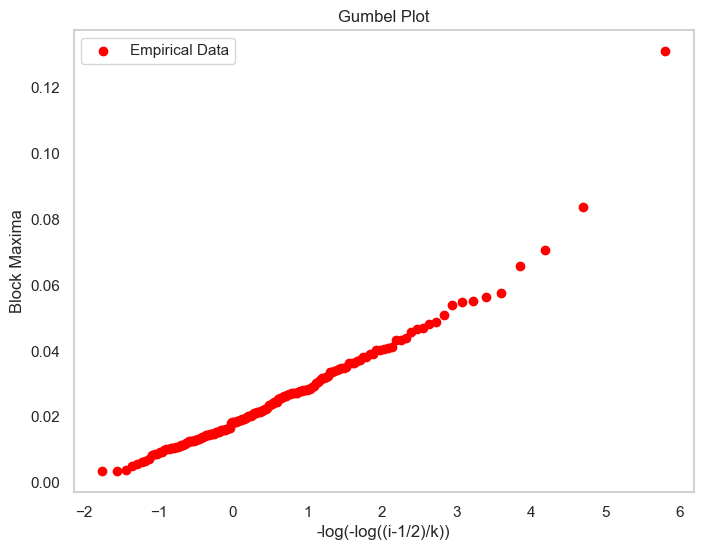

In [34]:
def plot_gumbel(block_maxima):
    """
    Trace le Gumbel Plot pour visualiser l'ajustement aux distributions extr√™mes.
    
    Args:
        block_maxima (pd.Series): S√©rie des maxima par bloc temporel.
    """
    block_maxima = block_maxima.sort_values()
    k = len(block_maxima)
    
    # Calcul des coordonn√©es du Gumbel plot
    x_values = -np.log(-np.log((np.arange(1, k + 1) - 0.5) / k))
    y_values = block_maxima.values
    
    # Trac√© du Gumbel plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, color="red", label="Empirical Data")
    plt.xlabel("-log(-log((i-1/2)/k))")
    plt.ylabel("Block Maxima")
    plt.title("Gumbel Plot")
    plt.legend()
    plt.grid()
    plt.show()

def main():
    # Charger les donn√©es
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')
    
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")

    # Calculer les maxima par bloc
    block_maxima = compute_block_maxima(df_train)
    
    # Afficher le Gumbel plot
    plot_gumbel(block_maxima)

if __name__ == "__main__":
    main()

#on peut aussi faire des tests genre vraisemblance apr√®s
#ou sur les intervalles de confiance

## Question c
Estimer les param√®tres de loi GEV (ou EV si pertinent)


In [35]:
# On utilise la loi GEV car la droite du Gumbel plot n'est pas forc√©ment lin√©aire,
# ce qui sugg√®re que Œæ ‚â† 0 et donc qu'une loi EV (Gumbel) simple n'est pas appropri√©e.

from scipy.stats import genextreme

def fit_gev(block_maxima):
    """
    Ajuste la loi GEV aux block maxima et affiche les param√®tres estim√©s.
    
    Args:
        block_maxima (pd.Series): S√©rie des maxima par bloc temporel.
    
    Returns:
        tuple: Param√®tres estim√©s (shape c, location loc, scale scale).
    """
    params_gev = genextreme.fit(block_maxima)
    c, loc, scale = params_gev
    
    return c, loc, scale

def main():
    # Charger les donn√©es
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')
    
    # D√©coupage en train/test
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")
    
    # Calculer les maxima par bloc sur df_train
    block_maxima = compute_block_maxima(df_train)
    
    # Ajuster la loi GEV
    c,loc,scale = fit_gev(block_maxima)
    print(f"Param√®tres GEV estim√©s (c, loc, scale): ({c}, {loc}, {scale})")

if __name__ == "__main__":
    main()


Param√®tres GEV estim√©s (c, loc, scale): (-0.13418815042297177, 0.018000267015993266, 0.010002404066454567)


## Question d
Faire une validation ex-ante (analyses graphiques, QQ-plot, etc.)

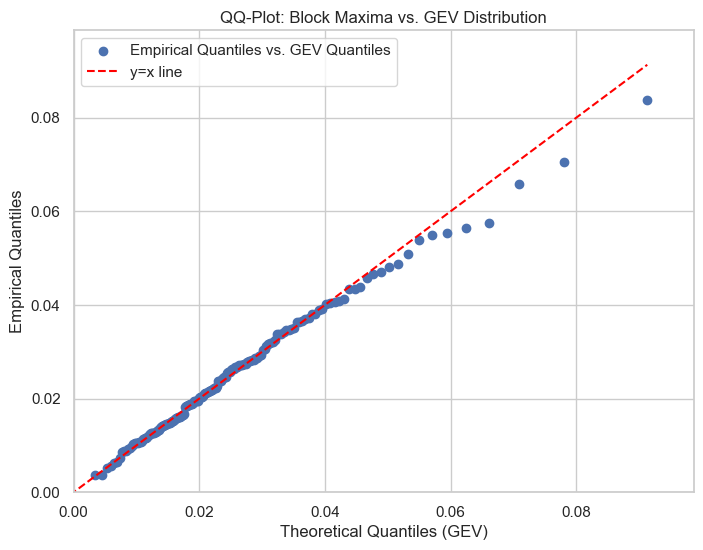

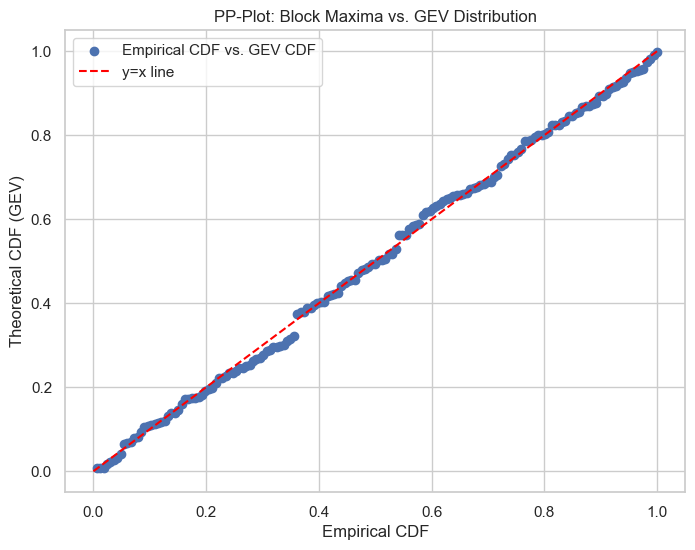

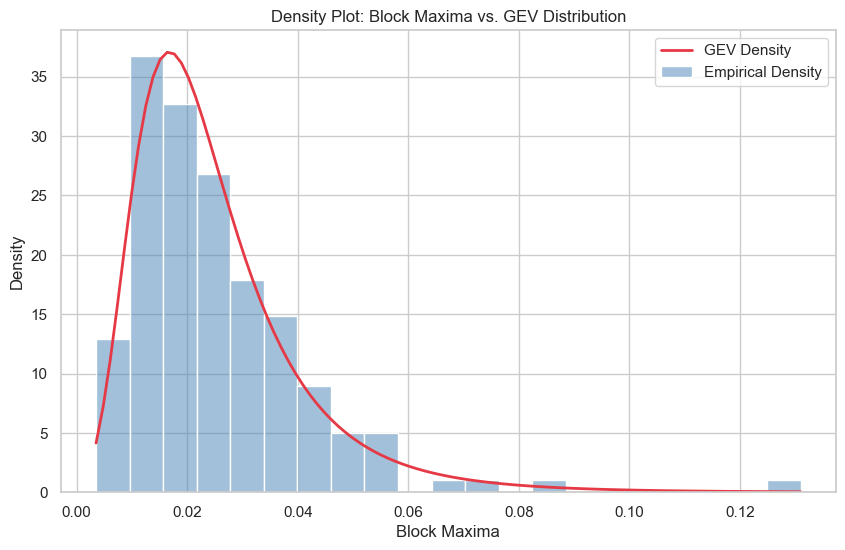

In [36]:
def plot_gev_diagnostics(block_maxima, c, loc, scale):
    """
    G√©n√®re les graphiques QQ-plot, PP-plot et densit√© pour comparer les block maxima √† la distribution GEV.
    
    Args:
        block_maxima (pd.Series): S√©rie des maxima par bloc temporel.
        c (float): Param√®tre de forme de la distribution GEV.
        loc (float): Param√®tre de localisation de la distribution GEV.
        scale (float): Param√®tre d'√©chelle de la distribution GEV.
    """
    # QQ-plot
    quantiles_gev = genextreme.ppf(np.linspace(0, 1, len(block_maxima)), c, loc=loc, scale=scale)
    plt.figure(figsize=(8, 6))
    plt.scatter(quantiles_gev, np.sort(block_maxima), label='Empirical Quantiles vs. GEV Quantiles')
    plt.plot(quantiles_gev, quantiles_gev, color='red', linestyle='--', label='y=x line')
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.xlabel('Theoretical Quantiles (GEV)')
    plt.ylabel('Empirical Quantiles')
    plt.title('QQ-Plot: Block Maxima vs. GEV Distribution')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # PP-plot
    ecdf = np.arange(1, len(block_maxima) + 1) / len(block_maxima)
    cdf_gev = genextreme.cdf(np.sort(block_maxima), c, loc=loc, scale=scale)
    plt.figure(figsize=(8, 6))
    plt.scatter(ecdf, cdf_gev, label='Empirical CDF vs. GEV CDF')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='y=x line')
    plt.xlabel('Empirical CDF')
    plt.ylabel('Theoretical CDF (GEV)')
    plt.title('PP-Plot: Block Maxima vs. GEV Distribution')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Density plot
    x = np.linspace(min(block_maxima), max(block_maxima), 100)
    density_gev = genextreme.pdf(x, c, loc=loc, scale=scale)
    plt.figure(figsize=(10, 6))
    sns.histplot(block_maxima, stat='density', kde=False, label='Empirical Density', color='#4682B4', alpha=0.5)
    plt.plot(x, density_gev, color='#E63946', lw=2, label='GEV Density')
    plt.xlabel('Block Maxima')
    plt.ylabel('Density')
    plt.title('Density Plot: Block Maxima vs. GEV Distribution')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    # Charger les donn√©es
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')
    
    # D√©coupage en train/test
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")
    
    # Calculer les maxima par bloc sur df_train
    block_maxima = compute_block_maxima(df_train)
    
    # Ajuster la loi GEV
    c, loc, scale = fit_gev(block_maxima)
    
    # Tracer les diagnostics
    plot_gev_diagnostics(block_maxima, c, loc, scale)

if __name__ == "__main__":
    main()

#commentaire du prof :
#les graphes sont vrmt pas mal car on regarde la queue de distribution d'une queue de distribution

## Question e
Calculer la VaR TVE par MB sur base d‚Äôapprentissage pour alpha = 99% \\
Attention :  $$ ùú∂(ùë©ùë¥) =ùú∂^s $$

In [72]:
from scipy.stats import genextreme

def compute_var_tve(alpha, c, loc, scale, freq='M'):
    """
    Calcule la Value at Risk (VaR) bas√©e sur la distribution GEV (Generalized Extreme Value).
    
    Args:
        alpha (float): Le niveau de confiance (par exemple, 0.99 pour un niveau de 99%).
        c (float): Param√®tre de forme de la distribution GEV.
        loc (float): Param√®tre de localisation de la distribution GEV.
        scale (float): Param√®tre d'√©chelle de la distribution GEV.
        freq (str): Fr√©quence des blocs temporels ('M' pour mois, 'Q' pour trimestre, 'Y' pour ann√©e).
        
    Returns:
        float: La VaR calcul√©e √† partir de la distribution GEV.
    """
    # D√©finir l'exposant en fonction de la fr√©quence
    if freq == 'M':  # Mensuel
        exponent = 21  # ~21 jours ouvr√©s par mois
    elif freq == 'Q':  # Trimestriel
        exponent = 63  # ~63 jours ouvr√©s par trimestre (21 jours/mois * 3 mois)
    elif freq == 'Y':  # Annuel
        exponent = 252  # ~252 jours ouvr√©s par an (21 jours/mois * 12 mois)
    else:
        raise ValueError("Fr√©quence non reconnue. Utilisez 'M' (mois), 'Q' (trimestre) ou 'Y' (ann√©e).")
    
    # Calcul de alpha_bm en fonction de la fr√©quence
    alpha_bm = alpha**exponent
    
    # Calcul de la VaR via la fonction quantile de la distribution GEV
    var_tve = genextreme.ppf(alpha_bm, c=c, loc=loc, scale=scale)
    
    # On prend l'oppos√© pour revenir aux rendements initiaux
    return -var_tve


def main():
    # Charger les donn√©es
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')
    
    # D√©coupage en train/test
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")
    
    # Calculer les maxima par bloc sur df_train
    block_maxima = compute_block_maxima(df_train)
    
    # Ajuster la loi GEV
    c, loc, scale = fit_gev(block_maxima)
    
    # Calculer la VaR TVE
    alpha = 0.99
    var_tve = compute_var_tve(alpha, c, loc, scale)
    
    print(f"La VaR TVE √† {alpha*100}% de confiance est : {var_tve*100:.4f}%")

if __name__ == "__main__":
    main()

La VaR TVE √† 99.0% de confiance est : -3.5303%


# 7.VaR TVE : Approche Peak over threshold

## Question a
Ecrire une fonction permettant d‚Äôobtenir le mean excess plot

In [38]:
import matplotlib.pyplot as plt

def mean_excess_plot(data, threshold_values):
    """
    Generates a mean excess plot for a given dataset and range of thresholds.

    Args:
        data: A 1D numpy array or pandas Series of data values.
        threshold_values: A 1D numpy array or list of threshold values.

    Returns:
        A tuple containing two lists: mean excesses and the corresponding threshold values.
    """

    mean_excesses = []
    for threshold in threshold_values:
        exceedances = data[data > threshold] - threshold
        if exceedances.size > 0 :
          mean_excess = exceedances.mean()
        else:
          mean_excess = np.nan  # Handle cases with no exceedances
        mean_excesses.append(mean_excess)

    return mean_excesses, threshold_values

## Question b
D√©terminer u par analyse graphique. \\
*Attention : ne pas consid√©rer ni les valeurs n√©gatives de u, ni les valeurs trop extr√™mes, au risque d‚Äô√©craser l‚Äô√©chelle visuelle du graphique.*


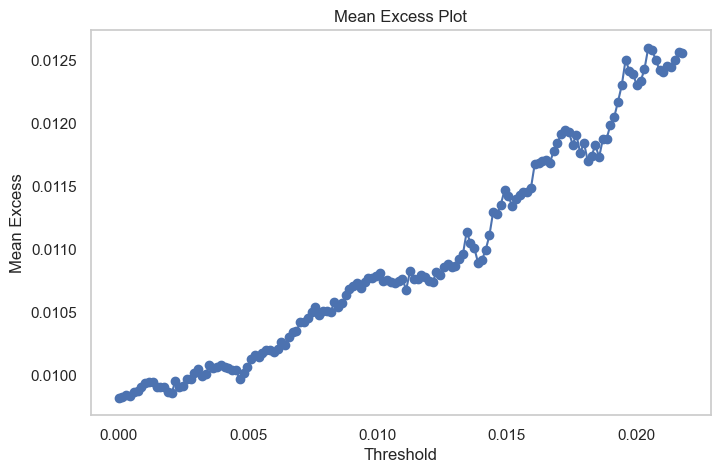

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def plot_mean_excess(df, quantile_plot):
    """
    Calcule et trace le Mean Excess Plot pour les rendements n√©gatifs.
    
    Args:
        df (pd.DataFrame): Le DataFrame contenant les rendements.
        quantile_plot (float) : quantile √† partir duquel nous tronquons les donn√©es pour l'affichage du graphique 
        
    Affiche:
        Un graphique du Mean Excess Plot pour les rendements n√©gatifs.
    """
    # Cr√©er une copie du DataFrame et inverser les rendements n√©gatifs
    df_copy = df.copy()
    df_copy['neg_log_returns'] = -df_copy['log_returns']  # Inverser les rendements

    quantile_percent = df_copy['neg_log_returns'].quantile(quantile_plot)

    # D√©finir un ensemble de valeurs seuils
    threshold_values = np.linspace(max(df_copy['neg_log_returns'].min(), 0), min(quantile_percent, df_copy['neg_log_returns'].max()), 150)

    # Calculer les exc√®s moyens
    mean_excesses, thresholds = mean_excess_plot(df_copy['neg_log_returns'], threshold_values)

    # Tracer le Mean Excess Plot
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, mean_excesses, marker='o', linestyle='-')
    plt.xlabel('Threshold')
    plt.ylabel('Mean Excess')
    plt.title('Mean Excess Plot')
    plt.grid()
    plt.show()

def main():
    # Charger les donn√©es (exemple, √† adapter selon tes donn√©es)
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')
    
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")
    
    quantile_plot = 0.95

    # Appeler la fonction pour g√©n√©rer et afficher le Mean Excess Plot
    plot_mean_excess(df_train, quantile_plot)

if __name__ == "__main__":
    main()
 


# dire qu'au del√† de 0.04, on est d√©j√† sur les queues de distribution
#pour la justification, on peut calculer le quantile √† 5% par exemple


#faire des fonctions lin√©aires par morceaux ?

In [40]:
'''plt.figure(figsize=(12, 6))
plt.plot(df_train.index, df_train['neg_log_returns'])
plt.axhline(y=0.012, color='r', linestyle='--', label='u = 0.012')
plt.xlabel('Time')
plt.ylabel('neg_log_returns')
plt.title('Time Series of neg_log_returns with Horizontal Line at u = 0.012')
plt.legend()
plt.grid(True)
plt.show()
'''

"plt.figure(figsize=(12, 6))\nplt.plot(df_train.index, df_train['neg_log_returns'])\nplt.axhline(y=0.012, color='r', linestyle='--', label='u = 0.012')\nplt.xlabel('Time')\nplt.ylabel('neg_log_returns')\nplt.title('Time Series of neg_log_returns with Horizontal Line at u = 0.012')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

## Question c
Estimer les param√®tres de loi GPD

In [41]:
from scipy.stats import genpareto
import pandas as pd

def fit_gpd_to_exceedances(df, threshold):
    """
    Ajuste la distribution de Pareto g√©n√©ralis√©e (GPD) sur les exc√®s au-dessus du seuil sp√©cifi√©.
    
    Args:
        df (pd.DataFrame): DataFrame contenant les rendements log.
        threshold (float): Le seuil au-dessus duquel on calcule les exc√®s.
        
    Returns:
        tuple: Les param√®tres estim√©s de la GPD (c, loc, scale).
    """
    # Filtrer les exc√®s au-dessus du seuil
    exceedances = df['neg_log_returns'][df['neg_log_returns'] > threshold] - threshold

    # Ajuster la distribution de Pareto g√©n√©ralis√©e (GPD) sur les exc√®s
    params_gpd = genpareto.fit(exceedances)

    # Extraire les param√®tres ajust√©s
    c, loc, scale = params_gpd

    return c, loc, scale

def main():
    # Charger les donn√©es (exemple, √† adapter selon tes donn√©es)
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')
    df['neg_log_returns'] = -df['log_returns'] 
    
    # D√©couper les donn√©es en train/test (exemple, √† adapter selon tes besoins)
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")
    
    # D√©finir le seuil (u) pour l'ajustement GPD
    threshold = 0.012
    
    # Appeler la fonction pour ajuster la GPD sur les exc√®s
    c, loc, scale = fit_gpd_to_exceedances(df_train, threshold)
    
    print(f"Les param√®tres estim√©s de la GPD (c, loc, scale) sont : ({c}, {loc}, {scale})")

if __name__ == "__main__":
    main()


Les param√®tres estim√©s de la GPD (c, loc, scale) sont : (0.13421790237448972, 1.2874483875162915e-05, 0.009290152910753843)


## Question d
Faire une validation ex-ante (analyse graphiques, QQ-plot, etc.)

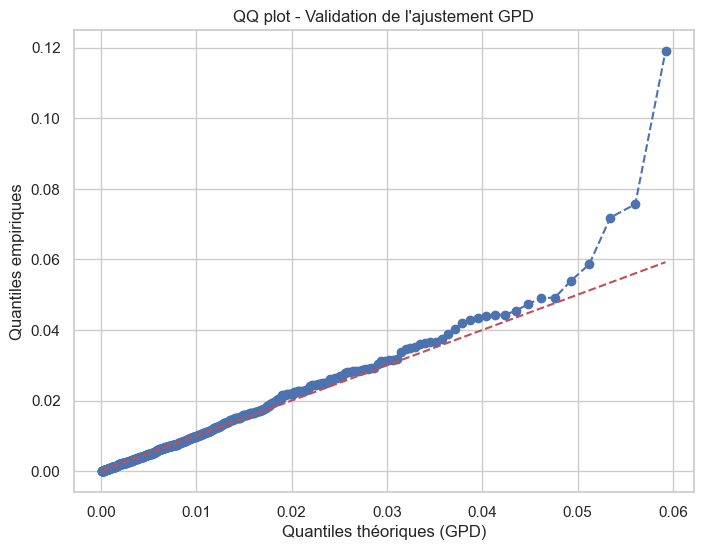

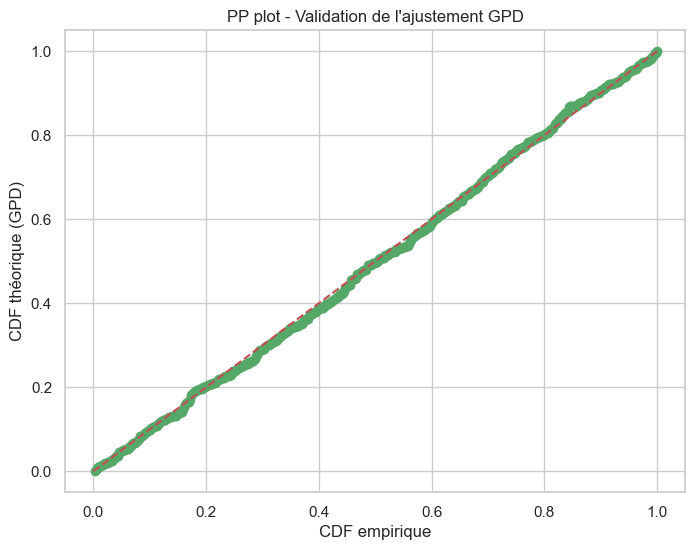

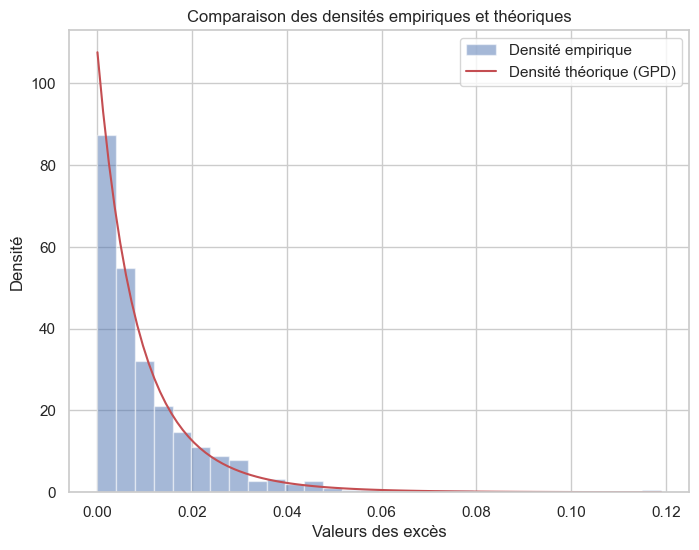

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import genpareto

def plot_gpd_diagnostics(exceedances, c, loc, scale):
    """
    G√©n√®re des graphiques pour valider l'ajustement GPD.
    
    Args:
        exceedances (pd.Series ou np.array): Les exc√®s au-dessus du seuil.
        c (float): Param√®tre de forme de la GPD.
        loc (float): Param√®tre de localisation de la GPD.
        scale (float): Param√®tre d'√©chelle de la GPD.
    """
    # 1. QQ plot (Quantile-Quantile Plot)
    theoretical_quantiles = genpareto.ppf(np.linspace(0.01, 0.99, len(exceedances)), c, loc, scale)
    empirical_quantiles = np.sort(exceedances)

    plt.figure(figsize=(8, 6))
    plt.plot(theoretical_quantiles, empirical_quantiles, marker='o', linestyle='--', color='b')
    plt.plot([min(theoretical_quantiles), max(theoretical_quantiles)], [min(theoretical_quantiles), max(theoretical_quantiles)], 'r--')
    plt.xlabel("Quantiles th√©oriques (GPD)")
    plt.ylabel("Quantiles empiriques")
    plt.title("QQ plot - Validation de l'ajustement GPD")
    plt.grid(True)
    plt.show()

    # 2. PP plot (Probability-Probability Plot)
    empirical_cdf = np.arange(1, len(exceedances) + 1) / len(exceedances)
    theoretical_cdf = genpareto.cdf(np.sort(exceedances), c, loc, scale)

    plt.figure(figsize=(8, 6))
    plt.plot(empirical_cdf, theoretical_cdf, marker='o', linestyle='--', color='g')
    plt.plot([0, 1], [0, 1], 'r--')  # Ligne d'identit√©
    plt.xlabel("CDF empirique")
    plt.ylabel("CDF th√©orique (GPD)")
    plt.title("PP plot - Validation de l'ajustement GPD")
    plt.grid(True)
    plt.show()

    # 3. Comparaison des densit√©s empiriques et th√©oriques
    plt.figure(figsize=(8, 6))
    plt.hist(exceedances, bins=30, density=True, alpha=0.5, label="Densit√© empirique")

    x_vals = np.linspace(min(exceedances), max(exceedances), 100)
    pdf_theoretical = genpareto.pdf(x_vals, c, loc, scale)
    plt.plot(x_vals, pdf_theoretical, 'r-', label="Densit√© th√©orique (GPD)")

    plt.xlabel("Valeurs des exc√®s")
    plt.ylabel("Densit√©")
    plt.title("Comparaison des densit√©s empiriques et th√©oriques")
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    # Charger les donn√©es (exemple, √† adapter selon tes donn√©es)
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')
    
    # Transformer les rendements log en rendements n√©gatifs
    df['neg_log_returns'] = -df['log_returns'] 
    
    # D√©couper les donn√©es en train/test (exemple, √† adapter selon tes besoins)
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")
    
    # D√©finir le seuil (u) pour l'ajustement GPD
    threshold = 0.012
    
    # Calculer les exc√®s
    exceedances = df_train['neg_log_returns'][df_train['neg_log_returns'] > threshold] - threshold
    
    # Ajuster la GPD sur les exc√®s
    c, loc, scale = fit_gpd_to_exceedances(df_train, threshold)
    
    # Appeler la fonction pour afficher les graphiques de validation
    plot_gpd_diagnostics(exceedances, c, loc, scale)

if __name__ == "__main__":
    main()


## Question e
Calculer la VaR TVE par PoT sur base d‚Äôapprentissage pour alpha = 99%.

on fait d'abord le redressement du niveau de quantile :
$$ 1 - Œ±_{POT} = \frac{n}{N_u} * (1 - Œ±) $$
avec $N_u$ le nombre d'observations au dessus du seuil

In [43]:
import numpy as np
import pandas as pd

def calculate_alpha_pot(df_train, exceedances, alpha):
    """
    Calcule l'alpha ajust√© (alpha_pot) pour une distribution d'exc√®s.
    
    Args:
        df_train (pd.DataFrame): DataFrame d'entra√Ænement contenant les rendements n√©gatifs.
        exceedances (pd.Series ou np.array): Les exc√®s au-dessus du seuil.
        alpha (float): Le niveau de confiance pour la VaR (Value at Risk).
        
    Returns:
        float: La valeur ajust√©e alpha_pot.
    """
    # Calcul de alpha_pot
    alpha_pot = 1 - (len(df_train['neg_log_returns'])) / len(exceedances) * (1 - alpha)
    return alpha_pot

def main():
    # Charger les donn√©es (exemple, √† adapter selon tes donn√©es)
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')
    
    # Transformer les rendements log en rendements n√©gatifs
    df['neg_log_returns'] = -df['log_returns']
    
    # D√©couper les donn√©es en train/test (exemple, √† adapter selon tes besoins)
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")
    
    # Calculer les exc√®s (pour cet exemple, on suppose un seuil de 0.012)
    threshold = 0.012
    exceedances = df_train['neg_log_returns'][df_train['neg_log_returns'] > threshold] - threshold
    
    # D√©finir le niveau de confiance
    alpha = 0.99
    
    # Appeler la fonction pour calculer alpha_pot
    alpha_pot = calculate_alpha_pot(df_train, exceedances, alpha)
    
    print(f"La valeur ajust√©e alpha_pot est : {alpha_pot:.4f}")

if __name__ == "__main__":
    main()


La valeur ajust√©e alpha_pot est : 0.9265


on calcule ensuite la VaR √† l'aide de cette formule:
$$ VaR_h(Œ±) = - H_{\hat{œÉ}, \hat{Œæ}}^{-1} (Œ±_{POT}) - u  $$

In [73]:
from scipy.stats import genpareto
import pandas as pd

def calculate_var_tve_pot(alpha_pot, c, loc, scale, u):
    """
    Calcule la VaR TVE par PoT (Peak over Threshold) pour une distribution GPD ajust√©e.
    
    Args:
        alpha_pot (float): Le niveau de confiance ajust√© (alpha_pot).
        c (float): Param√®tre de forme de la distribution GPD.
        loc (float): Param√®tre de localisation de la distribution GPD.
        scale (float): Param√®tre d'√©chelle de la distribution GPD.
        u (float): Le seuil au-dessus duquel on calcule les exc√®s.
        
    Returns:
        float: La VaR TVE par PoT calcul√©e.
    """
    # Calcul de la VaR TVE par PoT
    var_tve_pot = -genpareto.ppf(alpha_pot, c, loc, scale) - u
    return var_tve_pot

def main():
    # Charger les donn√©es (exemple, √† adapter selon tes donn√©es)
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')
    
    # Transformer les rendements log en rendements n√©gatifs
    df['neg_log_returns'] = -df['log_returns']
    
    # D√©couper les donn√©es en train/test (exemple, √† adapter selon tes besoins)
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")
    
    # D√©finir le seuil (u) pour l'ajustement GPD
    threshold = 0.012
    
    # Calculer les exc√®s (au-dessus du seuil)
    exceedances = df_train['neg_log_returns'][df_train['neg_log_returns'] > threshold] - threshold
    
    # Calculer alpha_pot
    alpha = 0.99
    alpha_pot = calculate_alpha_pot(df_train, exceedances, alpha)
    
    # Ajuster la GPD sur les exc√®s pour obtenir les param√®tres (c, loc, scale)
    c, loc, scale = fit_gpd_to_exceedances(df_train, threshold)
    
    # Calculer la VaR TVE par PoT
    var_tve_pot = calculate_var_tve_pot(alpha_pot, c, loc, scale, threshold)
    
    print(f"La VaR TVE par PoT √† {alpha*100}% de confiance est : {var_tve_pot*100:.4f}%")

if __name__ == "__main__":
    main()



La VaR TVE par PoT √† 99.0% de confiance est : -4.1047%


## Question f
Proposer un protocole permettant de calibrer u de mani√®re automatique, et le mettre en ≈ìuvre

la question est assez compliqu√©e, car normalement, on d√©termine le seuil u de mani√®re graphique : on cherche √† partir de quel seuil u le mean excess plot devient lin√©aire

perso, je veux essayer ce protocole :
-dans un premier temps, on tronque les 5% les plus extr√™mes sur le mean excess plot, car le comportement est assez h√©ratique g√©n√©ralement; si ce n'est pas le cas, alors la suppression ne change rien car la tendance lin√©aire devrait √™tre observ√©e plus t√¥t (si c'est stable)
-ensuite, le but est de trouver le seuil √† partir duquel on observe une tendance lin√©aire
pour ce faire, je pense que nous pouvons analyser diff√©rents seuils √† consid√©rer, avec des pas faible car on travaille sur les log-rendements (on pourrait analyser tous les seuils entre 0 et le max avec la tronquature, avec un pas de 0.001)
pour chaque seuil, on essaye de tracer une tendance lin√©aire entre les thresholds et les valeurs du mean excess plot
ensuite, on pourrait choisir le seuil u qui permet de maximiser le R carr√© (car cela voudra dire que nous avons trouv√© le seuil tq la droite lin√©aire s'ajuste le mieux aux donn√©es, ie que la relation entre le threshold et le mean excess est la plus repr√©sentative)

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


def find_optimal_threshold(data, step=0.001, quantile_cut=0.95):
    """
    Trouve le seuil optimal u en maximisant le R¬≤ de la tendance lin√©aire
    du mean excess plot.

    Args:
        data (array-like): Les donn√©es (log-rendements n√©gatifs).
        step (float): Pas d'it√©ration pour tester diff√©rents seuils.
        quantile_cut (float): Quantile pour tronquer les valeurs extr√™mes (ex: 0.95 pour supprimer 5%).

    Returns:
        float: Le seuil optimal u.
    """

    # Tronquer les valeurs extr√™mes
    max_threshold = np.quantile(data, quantile_cut)
    threshold_values = np.arange(0, max_threshold, step)

    # Calculer le mean excess plot
    mean_excesses, valid_thresholds = mean_excess_plot(data, threshold_values)

    best_r2 = -np.inf
    best_u = None

    for i, u in enumerate(valid_thresholds):
        if i < 10:  # Trop peu de points au d√©but
            continue

        # Extraire les seuils √† partir de u
        thresholds_above_u = np.array(valid_thresholds[i:])
        mean_excess_above_u = np.array(mean_excesses[i:])

        # V√©rifier si assez de points pour la r√©gression
        if len(thresholds_above_u) < 10:
            continue

        # Ajuster une r√©gression lin√©aire
        X = thresholds_above_u.reshape(-1, 1)
        y = mean_excess_above_u

        model = LinearRegression().fit(X, y)
        r2 = model.score(X, y)

        if r2 > best_r2:
            best_r2 = r2
            best_u = u

    return best_u

def main():
    # Charger les donn√©es (exemple, √† adapter selon tes donn√©es)
    df = pd.read_csv("fchi_data.csv", parse_dates=['Date'], index_col='Date')
    
    # Transformer les rendements log en rendements n√©gatifs
    df['neg_log_returns'] = -df['log_returns']
    
    # D√©couper les donn√©es en train/test (exemple, √† adapter selon tes besoins)
    df_train, df_test = split_train_test(df, "2008-10-15", "2022-07-26", "2022-07-27", "2024-06-11")
    
    # Trouver le seuil optimal
    optimal_u = find_optimal_threshold(df_train['neg_log_returns'])
    
    print(f"Seuil optimal trouv√© : {optimal_u:.4f}")

if __name__ == "__main__":
    main()

#on retrouve EXACTEMENT ce qu'on avait vu par analyse graphique donc carr√©


Seuil optimal trouv√© : 0.0120


# Cours III

VaR dynamique

comment d√©terminer si c'est soit un bruit blanc soit un mod√®le ARCH/GARCH (==> si les r√©sidus ont un cluster de volatilit√©):
regarder le carr√© des r√©sidus; on fait analyse ACF/PACF

Mod√®les Arch/GARCH
ARCH(1) :
$$ X_t =  œµ_t * \sqrt{a + b(X_{t-1}^2)}$$

page 14 : aussi mettre la stationnarit√© ie somme des coeff inf√©rieure √† 1



# 8. VaR GARCH 


Des m√©thodes de calcul de la Value at Risk traditionnelle au m√©thode int√©grant la th√©orie de la valeur extr√™me, on consid√©rait que la s√©rie des rendements est iid. Cependant, dans la r√©alit√©, les s√©ries financi√®res sont souvent caract√©ris√©es par une d√©pendance temporelle et une volatilit√© conditionnelle.  

De ce fait, il s'agira, dans cette partie, de prendre en compte la d√©pendance temporelle et la volatilit√© conditionnelle dans les s√©ries temporelles financi√®res. Pour ce faire, nous utiliserons un mod√®le de VAR dynamique avec le mod√®le GARCH.

Le mod√®le GARCH (Generalized Autoregressive Conditional Heteroskedasticity) est un mod√®le de volatilit√© conditionnelle qui permet de mod√©liser la volatilit√© des rendements financiers. Il a √©t√© introduit par Bollerslev en 1986. Le mod√®le GARCH est une extension du mod√®le ARCH (Autoregressive Conditional Heteroskedasticity) introduit par Engle en 1982. Le mod√®le GARCH est d√©fini par les √©quations suivantes:

$$
r_t = \mu_t + \epsilon_t
$$

$$
\epsilon_t = \sigma_t z_t
$$

$$
\sigma_t^2 = \omega + \sum \alpha_i \epsilon_{t-i}^2 + \sum \beta_i \sigma_{t-i}^2
$$

Dans ce mod√®le $\mu_t$ est un param√®tre de tendance moyenne √† identifier, $\epsilon_t$ est le r√©sidu, $\sigma_t^2$ est la variance conditionnelle, $z_t$ est un bruit blanc, $\omega$ est un param√®tre de constante, $\alpha_i$ et $\beta_i$ sont les param√®tres du mod√®le GARCH √† identifier.

In [28]:
# D√©finition des librairies
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

In [29]:
# Import des donn√©es du CAC 40
data = yf.download("^FCHI")

# Calcul des rendements logarithmiques
data['log_return'] = np.log(data['Close'] / data['Close'].shift(1))

# Retirer la premi√®re ligne
data = data.dropna()

[*********************100%***********************]  1 of 1 completed


In [30]:
train = data[['log_return',"Close"]]['15-10-2008':'26-07-2022']
data_train = train['log_return']

test = data[['log_return',"Close"]]['27-07-2022':'11-06-2024']
data_test = test['log_return']

### 8.a. Etude de l‚Äôapplicabilit√© d‚Äôun mod√®le AR[1]-GARCH[1,1]
Le mod√®le AR(1)-GARCH(1,1) est le mod√®le qui, en pratique, est utilis√© pour r√©aliser la VaR dynamique. Cependant, il n'est pas tout le temps adapt√© aux donn√©es financi√®res. Dans ce TP, nous allons commencer par tester l'√©ligibilit√© de ce mod√®le dans le cadre des donn√©es que nous poss√©dons. 

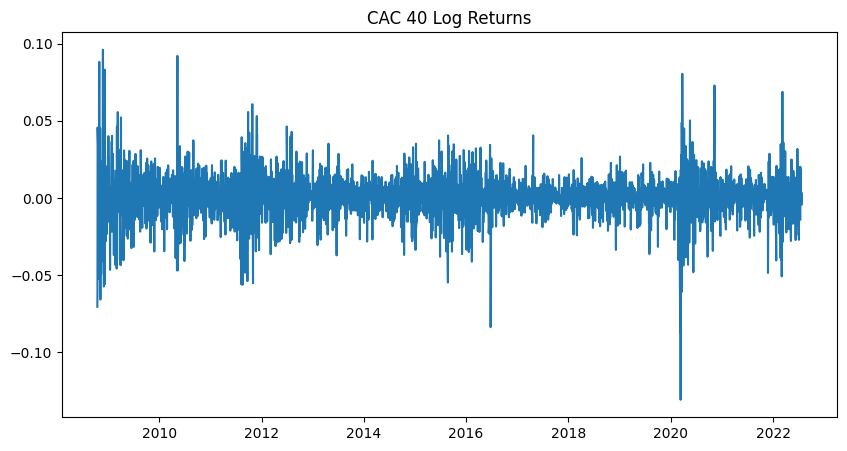

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data_train, label='Train')
plt.title('CAC 40 Log Returns')
plt.show()

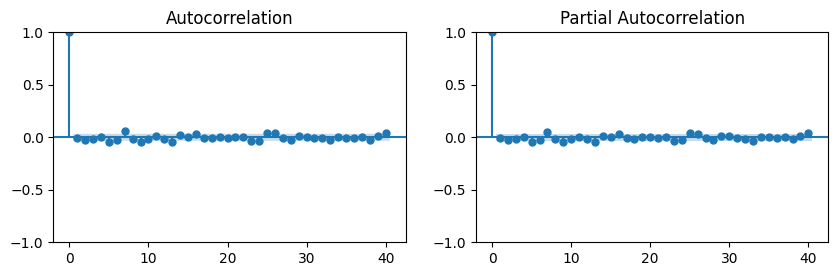

In [32]:
## ACF et PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 6))
plt.subplot(221)
plot_acf(data_train, ax=plt.gca(), lags=40)
plt.subplot(222)
plot_pacf(data_train, ax=plt.gca(), lags=40)
plt.show()


Dans la s√©rie temporelle que nous poss√©dons, nous constatons que la s√©rie peut √™tre mod√©liser par un AR(1). Pour un test plus rigoureux de cette hypoth√®se, nous allons utiliser la m√©thode de Lljung Box afin de d√©terminer le meilleur mod√®le qui puisse mod√©liser la s√©rie. Ainsi, pour un ordre pmax = 2 et qmax=2, nous allons :
1. Estimer les param√®tres du mod√®le ARMA(p,q) pour chaque combinaison de p et q
2. Calculer la statistique de Ljung Box pour chaque combinaison de p et q afin d'examiner si les r√©sidus d'un mod√®le sont du bruit blanc 
3. Filtrer les mod√®les pour lesquels les r√©sidus sont du bruit blanc 
4. Choisir le meilleur mod√®le en utilisant le crit√®re d'Akaike

In [33]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import boxcox
from statsmodels.stats.diagnostic import acorr_ljungbox

# Param√®tres du mod√®le
p_max = 2
q_max = 2
best_aic = np.inf
best_order = (0, 0, 0)

# Chargement de la s√©rie temporelle
np.random.seed(42)
data_unindex = data_train.copy()
data_unindex.reset_index(drop=True, inplace=True)

# Cr√©ation de la matrice pour stocker les AIC
aic_matrix = pd.DataFrame(np.nan, index=[f"p={p}" for p in range(p_max+1)], 
                          columns=[f"q={q}" for q in range(q_max+1)])

bb_test = pd.DataFrame(0, index=[f"p={p}" for p in range(p_max+1)], 
                          columns=[f"q={q}" for q in range(q_max+1)])

# Boucle pour estimer les mod√®les et stocker les AIC
for p in range(p_max + 1):
    for q in range(q_max + 1):
        try:
            model = ARIMA(data_unindex, order=(p, 0, q))
            out = model.fit()
            aic_matrix.loc[f"p={p}", f"q={q}"] = out.aic  # Stockage de l'AIC
            
            # Test de la blancheur des r√©sidus
            ljung_box_result = acorr_ljungbox(out.resid, lags=[1], return_df=True)
            p_value = ljung_box_result['lb_pvalue'].iloc[0]

            if p_value > 0.05:
                bb_test.loc[f"p={p}", f"q={q}"] = 1
            
            # Mise √† jour du meilleur mod√®le
            if out.aic < best_aic :
                best_aic = out.aic
                best_order = (p, 0, q)
                
        except Exception as e:
            print(f"Erreur avec (p={p}, q={q}): {e}")

print(f"Meilleur mod√®le ARIMA: {best_order} avec AIC={best_aic}")

print("="*30)
print("Matrice des AIC:")
print(aic_matrix)
print("="*30)
print("Matrice des test de Lljung box (1 lorsque r√©sidus non autocorr√©l√©s):")
print(bb_test)

Meilleur mod√®le ARIMA: (0, 0, 0) avec AIC=-20100.176479566246
Matrice des AIC:
              q=0           q=1           q=2
p=0 -20100.176480 -20098.205891 -20097.679059
p=1 -20098.227385 -20099.862840 -20097.046957
p=2 -20097.887027 -20098.545030 -20094.033191
Matrice des test de Lljung box (1 lorsque r√©sidus non autocorr√©l√©s):
     q=0  q=1  q=2
p=0    1    1    1
p=1    1    1    1
p=2    1    1    1


In [34]:
p = 1
q = 0

AR1 = ARIMA(data_unindex, order=(p, 0, q))
print(AR1.fit().summary())

                               SARIMAX Results                                
Dep. Variable:             log_return   No. Observations:                 3523
Model:                 ARIMA(1, 0, 0)   Log Likelihood               10052.114
Date:                Sat, 22 Mar 2025   AIC                         -20098.227
Time:                        23:33:41   BIC                         -20079.726
Sample:                             0   HQIC                        -20091.627
                               - 3523                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.621      0.535      -0.000       0.001
ar.L1         -0.0037      0.012     -0.321      0.748      -0.027       0.019
sigma2         0.0002   2.16e-06     89.947      0.0

En utilisant la m√©thode √©nonc√©e plus haut, nous constatons que le mod√®le ARMA(0,0) est le meilleur mod√®le. En effet, c'est le mod√®le avec le crit√®re d'Akaike le plus faible. Cela porte √† croire que la tendance moyenne de la s√©rie est constante. Nous allons tout de m√™me utiliser un mod√®le AR(1) pour la mod√©liser. En effet, c'est le deuxi√®me mod√®le avec un AIC faible.

Dans la s√©rie des r√©sidus, nous constatons des clusters de volatilit√© ce qui est signe d'une volatilit√© conditionnelle, et donc de la pr√©sence d'un GARCH. De plus, dans la s√©rie des r√©sidus du log-rendement, nous constatons une faible autocorr√©lation, ce qui les fait ressembler √† du bruit blanc. Toutefois, lorsque l'on examine ces r√©sidus au carr√©, la s√©rie temporelle pr√©sente g√©n√©ralement une forte autocorr√©lation, mise en √©vidence par la pr√©sence de grappes de volatilit√©. Cela sugg√®re que les rendements repr√©sentent un processus h√©t√©rosc√©dastique, ce qui rend le mod√®le GARCH particuli√®rement pertinent dans le cadre de notre √©tude.

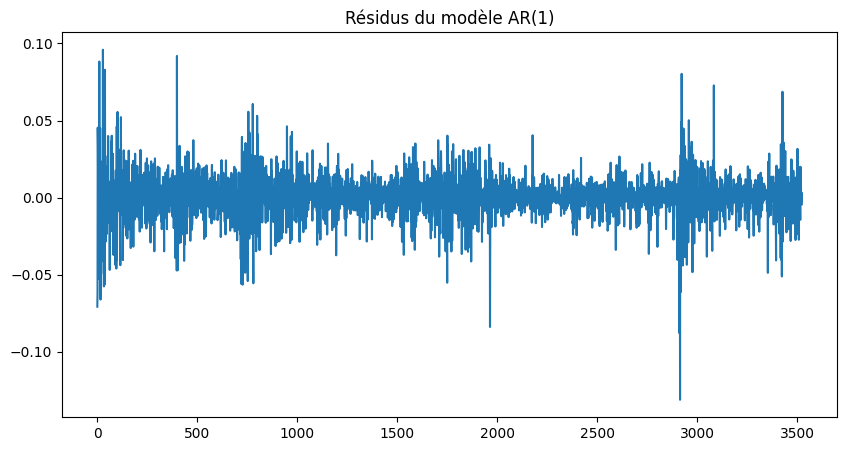

In [35]:
AR1_resid = AR1.fit().resid
plt.figure(figsize=(10, 5))
plt.plot(AR1_resid)
plt.title("R√©sidus du mod√®le AR(1)")
plt.show()

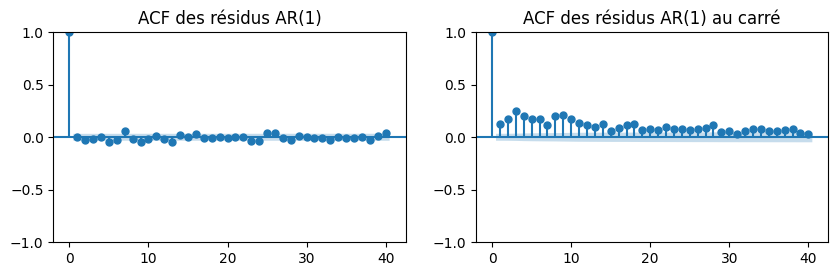

In [36]:
plt.figure(figsize=(10, 6))
plt.subplot(221)
plot_acf(AR1_resid, lags=40, ax=plt.gca())
plt.title("ACF des r√©sidus AR(1)")
plt.subplot(222)
plot_acf(AR1_resid**2, lags=40, ax=plt.gca())
plt.title("ACF des r√©sidus AR(1) au carr√©")
plt.show()

Motiv√©s par les commentaires de (Franke, H√§rdle et Hafner 2004) sugg√©rant que, dans les applications pratiques, les mod√®les GARCH avec des ordres plus petits d√©crivent souvent suffisamment les donn√©es et que dans la plupart des cas GARCH(1,1) est ad√©quat, nous avons consid√©r√© quatre combinaisons diff√©rentes de p=0, 1 et q=1, 2 pour chaque p√©riode afin d'entra√Æner le mod√®le GARCH, en supposant que les r√©sidus standardis√©s suivent une distribution normale.

In [37]:
import numpy as np
import pandas as pd
from arch import arch_model

def find_garch(p_min, p_max, q_min, q_max, data, dist="normal"):
    """
    Trouve le meilleur mod√®le GARCH(p, q) en minimisant l'AIC.

    Param√®tres :
    - p_min, p_max : Bornes pour p (ordre de l'AR dans la variance)
    - q_min, q_max : Bornes pour q (ordre de MA dans la variance)
    - data : S√©rie temporelle utilis√©e pour l'estimation
    - dist : Distribution des erreurs ("normal", "t", "ged", etc.)

    Retour :
    - DataFrame contenant les valeurs de AIC pour chaque combinaison (p, q)
    - Meilleur mod√®le GARCH trouv√© en fonction du crit√®re AIC
    """
    
    best_aic = np.inf
    best_order = (0, 0, 0)
    
    results = []

    for p in range(p_min, p_max + 1):
        for q in range(q_min, q_max + 1):
            try:
                # Sp√©cification du mod√®le GARCH(p, q)
                garch_spec = arch_model(data, vol='Garch', p=p, q=q, mean='zero', dist=dist)
                out = garch_spec.fit(disp="off")
                
                # Calcul de l'AIC
                current_aic = out.aic * len(data)

                # Mettre √† jour le meilleur mod√®le si un plus petit AIC est trouv√©
                if current_aic < best_aic:
                    best_aic = current_aic
                    best_order = (p, 0, q)
                
                # Ajouter les r√©sultats dans la liste
                results.append({'p': p, 'q': q, 'aic': current_aic, 'relative_gap': np.nan})
            
            except Exception as e:
                print(f"Erreur pour (p={p}, q={q}): {e}")
                continue
    
    # Convertir en DataFrame
    results_df = pd.DataFrame(results)

    # Calculer l'√©cart relatif par rapport au meilleur AIC
    results_df['relative_gap'] = (results_df['aic'] - best_aic) * 100 / best_aic
    
    return results_df, best_order

results_df, best_garch_order = find_garch(p_min=1, p_max=2, q_min=0, q_max=2, data=AR1_resid, dist="normal")

print(f"Meilleur mod√®le GARCH: {best_garch_order} avec AIC={best_aic}")
print("="*30)
print("R√©sultats pour les mod√®les test√©s:")
results_df.sort_values(by='relative_gap', ascending=False)

Meilleur mod√®le GARCH: (1, 0, 1) avec AIC=-20100.176479566246
R√©sultats pour les mod√®les test√©s:


p  q           aic  relative_gap
1  1  1 -7.495282e+07     -0.000000
4  2  1 -7.492640e+07     -0.035249
2  1  2 -7.488162e+07     -0.094992
5  2  2 -7.484512e+07     -0.143686
3  2  0 -7.283013e+07     -2.832037
0  1  0 -7.074632e+07     -5.612197

En utilisant le crit√®re AIC pour s√©lectionner le meilleur mod√®le, nous avons conclu que GARCH(1,1) est effectivement le meilleur mod√®le.

### 8.b. Estimation les param√®tres du mod√®le AR[1]-GARCH[1,1] 

In [38]:
AR1 = ARIMA(data_unindex, order=(1, 0, 0))
AR1_resid = AR1.fit().resid
garch11 = arch_model(AR1_resid, vol='Garch', p=1, q=1, mean='zero', dist='normal')
print("="*78)
print("R√©sum√© du mod√®le GARCH(1,1)")
print("="*78)
print(garch11.fit(disp="off").summary())

R√©sum√© du mod√®le GARCH(1,1)
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                10640.6
Distribution:                  Normal   AIC:                          -21275.3
Method:            Maximum Likelihood   BIC:                          -21256.8
                                        No. Observations:                 3523
Date:                Sat, Mar 22 2025   Df Residuals:                     3523
Time:                        23:33:42   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.8925e-06  1.14

In [39]:
cond_resid =garch11.fit(disp="off").conditional_volatility # Volatilit√© conditionnelle => sigma_t
resid = garch11.fit(disp="off").resid # r√©sidus du mod√®le => eps_t
resid_std = garch11.fit(disp="off").std_resid  # r√©sidus studentis√©s => eta_t

# jarque bera test
from scipy.stats import jarque_bera

jb_test = jarque_bera(resid_std)
print("H0: Les r√©sidus studentis√©s suivent une loi normale")
print(f"Test de Jarque-Bera sur les r√©sidus studentis√©s: JB={jb_test[0]}, p-value={jb_test[1]}")
# reject the null hypothesis of normality for the distribution of the residuals, 
# as a rule of thumb, which implies that the data to be fitted is not
# normally distributed

H0: Les r√©sidus studentis√©s suivent une loi normale
Test de Jarque-Bera sur les r√©sidus studentis√©s: JB=850.9780785425617, p-value=1.631015672319655e-185


Le mod√®le AR(1)-GARCH(1,1) estim√© est le suivant :

$$
r_t = \mu_t + \epsilon_t
$$

o√π $\mu_t = 0.0001 - 0.0037 r_{t-1}$
 
$$
\epsilon_t = \sigma_t \eta_t
$$

$$
\sigma_t^2 = 3.89 \times 10^{-6} + 0.10 \times \epsilon_{t-i}^2 + 0.88 \times \sigma_{t-i}^2
$$

avec $\eta_t$ un bruit blanc suppos√©e gaussien.

Dans ce cas, nous rencontrons des probl√®mes au niveau de la significativit√© du coefficient AR(1). En effet, il aurait √©t√© plus judicieux de ne pas mod√©liser la tendance moyenne du rendement et la supposer constante. En ce qui concerne les param√®tres du mod√®le GARCH, nous constatons que (Œ± + Œ≤) = 0.98, ce qui est tr√®s proche de 1, ce qui sugg√®re une volatilit√© persistante mais stationnaire.


### 8.c. V√©rification des r√©sidus de l‚ÄôAR[1]-GARCH[1,1]

In [40]:
# Test d'homosc√©dasticit√©
# Ljung-Box test sur r√©sidus
lb_test_resid = acorr_ljungbox(resid_std, lags=[i for i in range(1, 13)], return_df=True)
print("Ljung-Box Test sur r√©sidus:\n", lb_test_resid)

# Ljung-Box test sur carr√©s des r√©sidus
lb_test_resid_sq = acorr_ljungbox(resid_std**2, lags=[i for i in range(1, 13)], return_df=True)
print("Ljung-Box Test sur carr√©s des r√©sidus:\n", lb_test_resid_sq)

Ljung-Box Test sur r√©sidus:
      lb_stat  lb_pvalue
1   0.000846   0.976797
2   0.564325   0.754151
3   0.689613   0.875644
4   1.252257   0.869422
5   2.243790   0.814486
6   2.516231   0.866647
7   2.832293   0.900071
8   2.957450   0.936999
9   3.865158   0.920061
10  4.764025   0.906374
11  4.862760   0.937630
12  6.985621   0.858562
Ljung-Box Test sur carr√©s des r√©sidus:
       lb_stat  lb_pvalue
1    0.236929   0.626433
2    0.297870   0.861625
3    6.739220   0.080691
4    7.481678   0.112520
5    8.164607   0.147394
6    8.302654   0.216758
7    8.813775   0.266304
8    9.474246   0.303880
9   10.047266   0.346672
10  11.646076   0.309441
11  13.473337   0.263516
12  13.893580   0.307556


In [41]:
# LM test pour les effets ARCH
from statsmodels.stats.diagnostic import het_arch

lm_test = het_arch(resid_std)
print('LM Test Statistique: %.3f, p-value: %.3f' % (lm_test[0], lm_test[1]))

LM Test Statistique: 12.286, p-value: 0.266


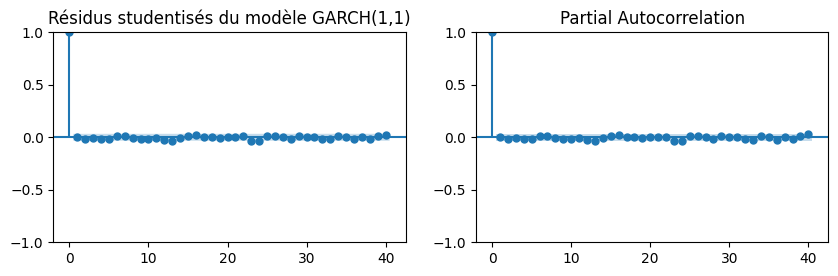

In [42]:
plt.figure(figsize=(10, 6))
plt.subplot(221)
plot_acf(resid_std, lags=40, ax=plt.gca())
plt.title("ACF des r√©sidus studentis√©s")
plt.title("R√©sidus studentis√©s du mod√®le GARCH(1,1)")
plt.subplot(222)
plot_pacf(resid_std, lags=40, ax=plt.gca())
plt.show()

De plus, au niveau du GARCH(1,1), les r√©sidus sont bien des bruits blancs homosc√©dastiques (test de lljung box et test LM). Cependant, nous avons suppos√© que $\eta_t$ est un bruit blanc gaussien. Cela n'est pas v√©rifi√©. Il aurait √©t√© judicieux de tester d'autres distributions telles que Students‚Äôs t (‚Äôt‚Äô, ‚Äòstudentst‚Äô), Skewed Student‚Äôs t (‚Äòskewstudent‚Äô, ‚Äòskewt‚Äô) ou encore Generalized Error Distribution (GED). 

<blockquote>
**Test de Lagrange Multiplier (LM) pour l'effet ARCH**

Le test de Lagrange Multiplier (LM) pour l'effet ARCH est un outil statistique qui v√©rifie la pr√©sence d'effets ARCH (AutoRegressive Conditional Heteroskedasticity) dans une s√©rie temporelle.

L'effet ARCH se manifeste lorsque la variance d'une erreur est une fonction de ses erreurs pass√©es. Cette propri√©t√© est courante dans les s√©ries temporelles financi√®res, o√π de grandes variations des rendements sont souvent suivies par de grandes variations et vice versa.

Le test de LM v√©rifie l'hypoth√®se nulle que les erreurs sont homosc√©dastiques (variance constante). Si la p-value du test est inf√©rieure √† un seuil pr√©d√©fini (g√©n√©ralement 0,05), l'hypoth√®se nulle est rejet√©e, indiquant la pr√©sence d'effets ARCH.
</blockquote>


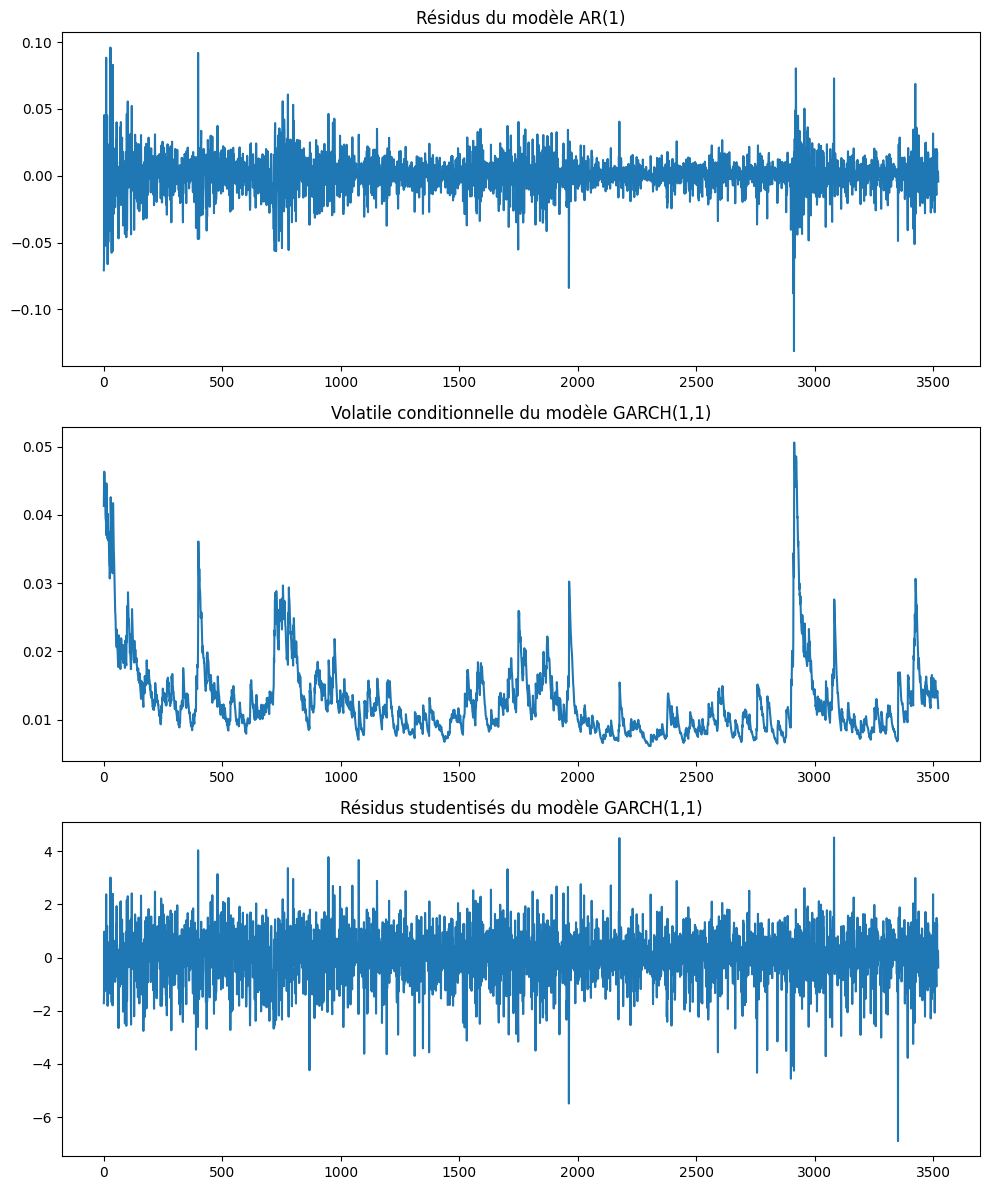

In [43]:
# Cr√©ation de la figure avec des sous-graphiques align√©s verticalement
plt.figure(figsize=(10, 12))

# Premier graphique : CAC 40
plt.subplot(311)
plt.plot(resid) 
plt.title("R√©sidus du mod√®le AR(1)")

# Deuxi√®me graphique : R√©sidus du mod√®le AR(1)
plt.subplot(312)
plt.plot(cond_resid)
plt.title("Volatile conditionnelle du mod√®le GARCH(1,1)")

# Troisi√®me graphique : R√©sidus studentis√©s du mod√®le GARCH(1,1)
plt.subplot(313)
plt.plot(resid_std, label='R√©sidus studentis√©s du mod√®le GARCH(1,1)')
plt.title("R√©sidus studentis√©s du mod√®le GARCH(1,1)")

# Affichage des graphiques
plt.tight_layout()
plt.show()


### 8.d. Dynamique historique de $\mu_t$ et $\sigma_t$

$$
r_t = \mu_t + \sigma_t \times \epsilon_t
\quad
\text{avec} \quad
\begin{cases}
    \mu_t = \mu + \varphi r_{t-1} \\
    \sigma_t^2 = \omega + a (r_{t-1} - \mu_{t-1})^2 + b \sigma_{t-1}^2
\end{cases}
$$

Pour avoir la dynamique historique de $\mu_t$ et $\sigma_t$, nous allons utiliser les donn√©es historiques de la s√©rie temporelle ainsi que les estimations des param√®tres $\Theta = (\mu, \varphi, \omega, a, b)$ du mod√®le AR(1)-GARCH(1,1) que nous avons estim√© pr√©c√©demment par maximum de vraisemblance.

Pour $t=1$, nous allons initialiser $\mu_1$ par la moyenne $\hat{\mu}$ et $\sigma_1$ par la variance √† long terme $\frac{\omega}{1 - a - b}$.

In [44]:
print(AR1.fit().summary())

# tester arima avec arch_model ou arch
mu = AR1.fit().params[0]
print(f"Param√®tre mu: {mu}")
phi = AR1.fit().params[1]
print(f"Param√®tre phi: {phi}")

                               SARIMAX Results                                
Dep. Variable:             log_return   No. Observations:                 3523
Model:                 ARIMA(1, 0, 0)   Log Likelihood               10052.114
Date:                Sat, 22 Mar 2025   AIC                         -20098.227
Time:                        23:33:43   BIC                         -20079.726
Sample:                             0   HQIC                        -20091.627
                               - 3523                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.621      0.535      -0.000       0.001
ar.L1         -0.0037      0.012     -0.321      0.748      -0.027       0.019
sigma2         0.0002   2.16e-06     89.947      0.0

In [45]:
print(garch11.fit(disp="off").summary())
omega = garch11.fit(disp="off").params[0]
print(f"Param√®tre omega: {omega}")
a = garch11.fit(disp="off").params[1]
print(f"Param√®tre alpha: {a}")
b = garch11.fit(disp="off").params[2]
print(f"Param√®tre beta: {b}")

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                10640.6
Distribution:                  Normal   AIC:                          -21275.3
Method:            Maximum Likelihood   BIC:                          -21256.8
                                        No. Observations:                 3523
Date:                Sat, Mar 22 2025   Df Residuals:                     3523
Time:                        23:33:44   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.8925e-06  1.141e-11  3.411e+05      0.000 [3.

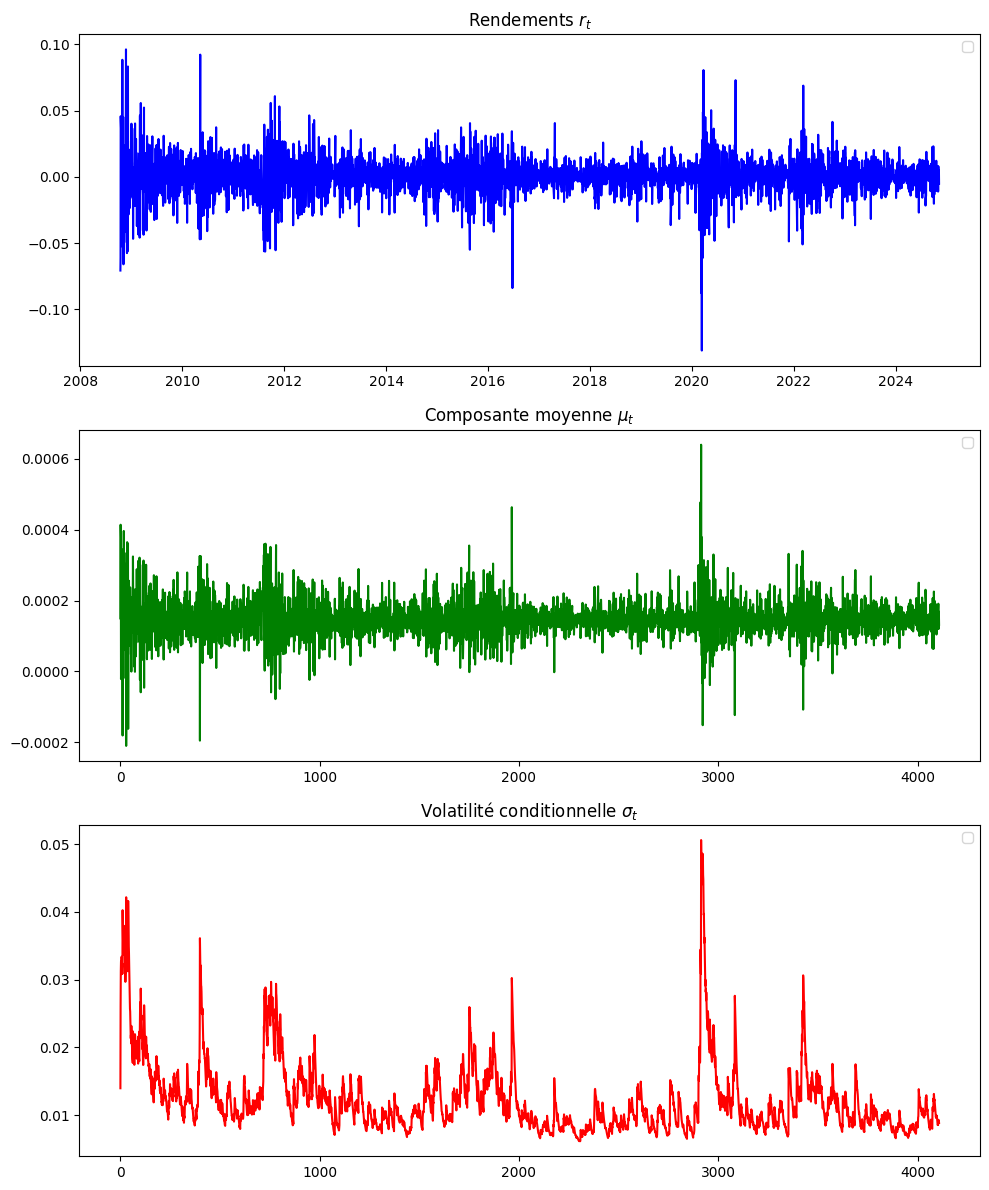

In [46]:
T_train = len(data_train)
T_test = len(data_test)

T = T_train + T_test

# Initialisation des s√©ries
r = pd.concat([data_train, data_test], axis=0)
mu_t = np.zeros(T)    # Composante moyenne
sigma2 = np.zeros(T)  # Variance conditionnelle

# Conditions initiales
mu_t[0] = mu
sigma2[0] = omega / (1 - a - b)  # Variance de long terme

# Simulation du mod√®le
for t in range(1, T):
    mu_t[t] = mu + phi * r[t-1]  # Partie moyenne
    sigma2[t] = omega + a * (r[t-1] - mu_t[t-1])**2 + b * sigma2[t-1]  # Variance conditionnelle

# Affichage des r√©sultats
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

ax[0].plot(r, color="blue")
ax[0].set_title("Rendements $r_t$")
ax[0].legend()

ax[1].plot(mu_t, color="green")
ax[1].set_title("Composante moyenne $\mu_t$")
ax[1].legend()

ax[2].plot(np.sqrt(sigma2), color="red")
ax[2].set_title("Volatilit√© conditionnelle $\sigma_t$")
ax[2].legend()

plt.tight_layout()
plt.show()


En analysant la dynamique de $\mu_t$, nous constatons que la tendance moyenne est tr√®s semblable √† la s√©rie des log-rendements. Cela est d√ª au fait que le mod√®le AR(1) n'est pas pertinent pour mod√©liser la s√©rie. En effet, la s√©rie des log-rendements ressemble d√©j√† √† un bruit blanc. Par ailleurs, nous observons de fortes p√©riodes de volatilit√© dans la s√©rie des log-rendements pendant les p√©riodes de crises, i.e. 2008-2009 qui correspond √† la crise des subprimes et 2020 qui correspond √† la crise du Covid-19. Le mod√®le GARCH semble bien capturer ces p√©riodes de volatilit√© dans la volatilit√© conditionnelle calibr√©e.

### 8.e. Estimation de la VaR

#### 8.e.i. Estimation de la VaR sur les r√©sidus

Pour calibrer la VaR dynamique, il est tout d'abord necessaire de calibrer la VaR sur les r√©sidus. En effet, la VaR sur les r√©sidus est une √©tape pr√©liminaire √† la calibration de la VaR dynamique. Pour ce faire, nous allons utiliser les r√©sidus du mod√®le AR(1)-GARCH(1,1) que nous avons estim√© pr√©c√©demment. Nous allons ensuite calculer la VaR sur les r√©sidus en utilisant les r√©sidus studentis√©s. Pour ce faire, il est possible d'appliquer la m√©thode historique, la m√©thode gaussienne, la m√©thode skew student, ou encore la m√©thode TVE (Block Maxima ou Peak Over Threshold). Dans notre cas, nous utiliserons la m√©thode historique et la m√©thode TVE (Block Maxima).

In [47]:

# VaR historique

def historical_var(data, alpha=0.99):
    """
    Calcul de la VaR historique
    data : les rendements logarithmiques
    alpha : le niveau de confiance
    """
    return -np.percentile(data, 100*(1 - alpha))


# VaR BM
from scipy.stats import genextreme as gev

import numpy as np
import pandas as pd
neg_resid = -resid_std

def get_extremes(returns, block_size, min_last_block=0.6):
    """
    Extrait les valeurs extr√™mes d'une s√©rie de rendements par blocs.
    
    Arguments :
    returns : pandas Series (index = dates, valeurs = rendements)
    block_size : int, taille du bloc en nombre de jours
    min_last_block : float, proportion minimale pour inclure le dernier bloc incomplet
    
    Retourne :
    maxima_sample : liste des valeurs maximales par bloc
    maxima_dates : liste des dates associ√©es aux valeurs maximales
    """
    n = len(returns)
    num_blocks = n // block_size

    maxima_sample = []
    maxima_dates = []

    for i in range(num_blocks):
        block_start = i * block_size
        block_end = (i + 1) * block_size
        block_data = returns.iloc[block_start:block_end]  # S√©lectionner le bloc avec les index

        max_value = block_data.max()
        max_date = block_data.idxmax()  # R√©cup√©rer l'index de la valeur max

        maxima_sample.append(max_value)
        maxima_dates.append(max_date)

    # Gestion du dernier bloc s'il reste des donn√©es suffisantes
    block_start = num_blocks * block_size
    block_data = returns.iloc[block_start:]

    if len(block_data) >= min_last_block * block_size:
        max_value = block_data.max()
        max_date = block_data.idxmax()
        
        maxima_sample.append(max_value)
        maxima_dates.append(max_date)
        
    return pd.Series(maxima_sample, index=maxima_dates)  # Retourner une Series avec les dates comme index



def BM_var(alpha,s,shape,loc,scale):
    """
    Calcul de la VaR gaussienne
    alpha : le niveau de confiance de la VaR
    s : le nombre de jours dans un bloc
    """
    alpha_bm = 1-s*(1-alpha)

    return gev.ppf(alpha_bm, shape, loc = loc, scale = scale),alpha_bm

extremes = get_extremes(neg_resid, block_size=21, min_last_block=0.6)
params_gev = gev.fit(extremes)
print("="*80)
print("Les param√®tres estim√©s de la loi de GEV sont : ")
print("-"*15)
print(f"Shape (xi) = {params_gev[0]:.2f}")
print(f"Localisation (mu) = {params_gev[1]:.2f}")
print(f"Echelle (sigma) = {params_gev[2]:.2f}")
print("="*80)







Les param√®tres estim√©s de la loi de GEV sont : 
---------------
Shape (xi) = -0.01
Localisation (mu) = 1.66
Echelle (sigma) = 0.72


In [48]:
alpha = 0.99

var_hist_train = historical_var(resid_std, alpha=alpha)
var_BM_train,_ = BM_var(0.99, 21, *params_gev)

# in a df
var = pd.DataFrame({
    'Historique': [var_hist_train],
    'Block Maxima': [var_BM_train],
})

print("="*80)
print("Value at Risk sur les r√©sidus studentis√©s (en %) pour h=1j")
print(round(-100*var,2))
print("="*80)

Value at Risk sur les r√©sidus studentis√©s (en %) pour h=1j
   Historique  Block Maxima
0     -266.22       -270.14


#### 8.e.ii. Calcul de la VaR dynamique et les exceptions associ√©es sur la base de test


##### Avec la m√©thode historique

In [49]:
var_t = np.zeros(T_test)    # Composante moyenne
nb_exp = 0
for t in range(T_test):
    var_t[t] = - (mu_t[t+T_train] + np.sqrt(sigma2[t+T_train])*var_hist_train)
    nb_exp += (r[t+T_train] < var_t[t]).astype(int)
    
var_t = pd.Series(var_t, index=data_test.index)
print(f"Nombre d'exceptions = {nb_exp} sur {T_test} jours")

Nombre d'exceptions = 4 sur 586 jours


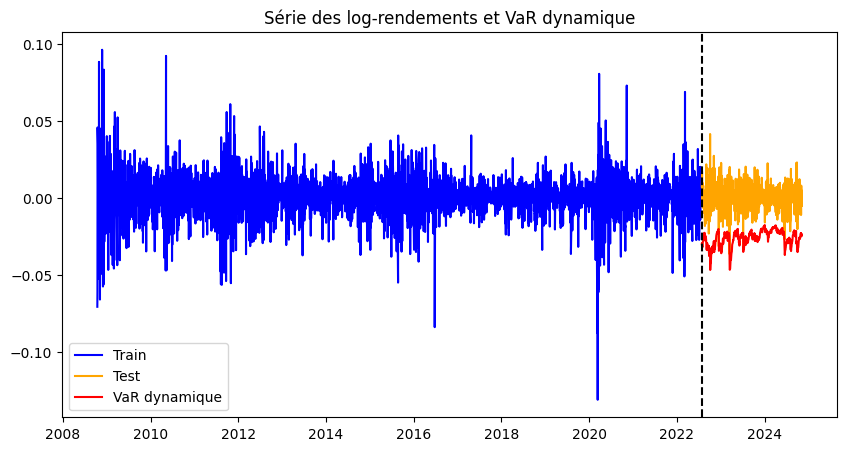

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(data_train, color="blue", label='Train')
plt.plot(data_test, color="orange", label='Test')
plt.plot(var_t, color="red",label='VaR dynamique')
plt.axvline(x=data_test.index[0], color='black', linestyle='--')
plt.legend()
plt.title('S√©rie des log-rendements et VaR dynamique')
plt.show()

Text(0.5, 1.0, 'Zoom sur la VaR dynamique')

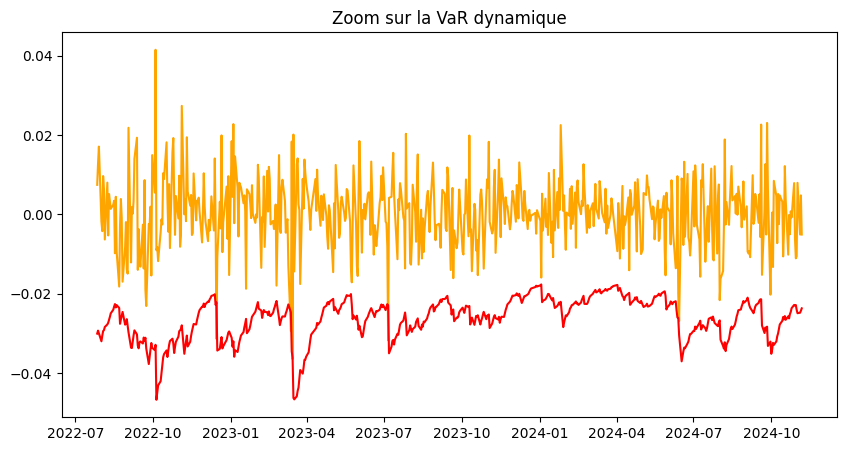

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(data_test, color="orange")
plt.plot(var_t, color="red")
plt.title('Zoom sur la VaR dynamique')

##### Avec la m√©thode Block maxima

In [52]:
var_t = np.zeros(T_test)    # Composante moyenne
nb_exp = 0
for t in range(T_test):
    var_t[t] = - (mu_t[t+T_train] + np.sqrt(sigma2[t+T_train])*var_BM_train)
    nb_exp += (r[t+T_train] < var_t[t]).astype(int)
    
var_t = pd.Series(var_t, index=data_test.index)
print(f"Nombre d'exceptions = {nb_exp} sur {T_test} jours")

Nombre d'exceptions = 3 sur 586 jours


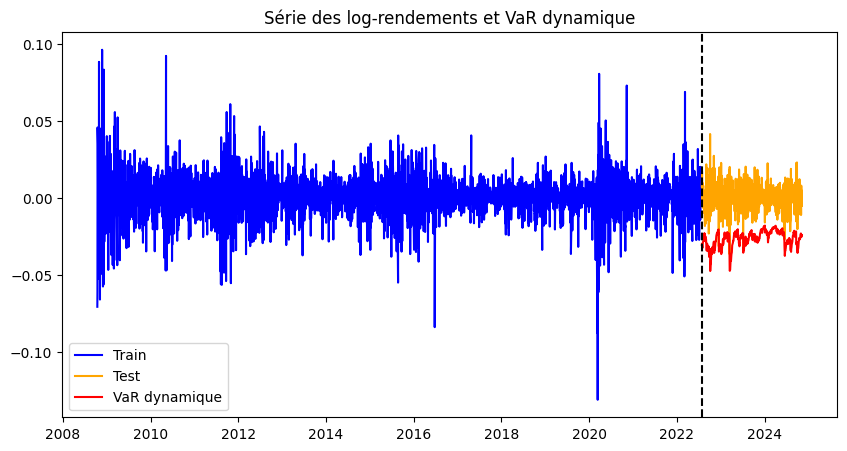

In [53]:
plt.figure(figsize=(10, 5))
plt.plot(data_train, color="blue", label='Train')
plt.plot(data_test, color="orange", label='Test')
plt.plot(var_t, color="red",label='VaR dynamique')
plt.axvline(x=data_test.index[0], color='black', linestyle='--')
plt.legend()
plt.title('S√©rie des log-rendements et VaR dynamique')
plt.show()

Text(0.5, 1.0, 'Zoom sur la VaR dynamique')

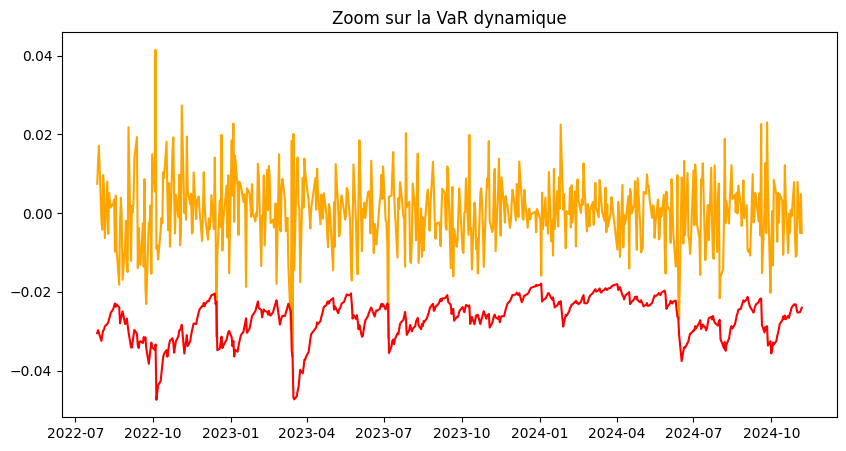

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(data_test, color="orange")
plt.plot(var_t, color="red")
plt.title('Zoom sur la VaR dynamique')

Avec la m√©thode BM ou historique, les VaR dynamiques calibr√©es sont √† peu √™tre identique. 
En effet, la m√©thode historique g√©n√®re 4 exceptions tandis que la m√©thode BM g√©n√®re 3 exceptions. Cela est du √† l'estimation de la VaR selon ces duex m√©thodes sur les r√©sidus studentis√©s.

# Conclusion

√Ä travers ce travail pratique, nous avons explor√© plusieurs approches d‚Äôestimation de la Value at Risk (VaR), chacune fond√©e sur des hypoth√®ses et des m√©thodes statistiques sp√©cifiques.

La premi√®re partie, consacr√©e aux m√©thodes classiques (historique, param√©trique gaussienne et studentienne), a mis en lumi√®re leur simplicit√© d‚Äôimpl√©mentation, mais aussi leurs limites. En particulier, ces mod√®les peinent √† repr√©senter correctement les queues √©paisses des distributions financi√®res, ce qui peut conduire √† une sous-estimation significative du risque en p√©riode de forte volatilit√©.

La deuxi√®me partie a introduit les techniques issues de la th√©orie des valeurs extr√™mes (EVT). En se concentrant sur le comportement des queues de distribution, ces m√©thodes permettent une estimation plus robuste des pertes rares mais s√©v√®res. L‚Äôapproche Peaks-Over-Threshold (POT), notamment, s‚Äôest r√©v√©l√©e bien adapt√©e aux donn√©es financi√®res, bien que la pertinence des r√©sultats d√©pende fortement du choix du seuil.

La troisi√®me partie a √©t√© consacr√©e aux mod√®les GARCH, qui permettent de mod√©liser l‚Äôh√©t√©rosc√©dasticit√© conditionnelle des rendements. En capturant la dynamique temporelle de la volatilit√©, ces mod√®les rendent la VaR plus sensible aux conditions de march√©. Lorsqu‚Äôils sont combin√©s √† des distributions non gaussiennes (comme Student ou GED), ils permettent d‚Äôam√©liorer la pr√©cision de l‚Äôestimation du risque.

En somme, chaque m√©thode a ses forces et ses faiblesses. Pour un gestionnaire de risque, il est essentiel de ne pas s‚Äôappuyer sur une approche unique, mais au contraire de combiner plusieurs m√©thodes, en tenant compte des caract√©ristiques du portefeuille, du contexte de march√© et de l‚Äôhorizon temporel vis√©. Ce parcours comparatif illustre l‚Äôimportance de recourir √† des mod√®les plus flexibles et sp√©cialis√©s, notamment en p√©riode de stress financier, pour disposer d'une estimation plus fiable de la VaR.

Au-del√† de la simple conformit√© r√©glementaire, la VaR demeure un outil central pour les investisseurs et les institutions financi√®res, leur permettant d‚Äôidentifier, de mesurer et de g√©rer leurs expositions au risque. N√©anmoins, puisqu‚Äôelle repose sur une mod√©lisation statistique, la VaR est expos√©e √† ce que l‚Äôon appelle le risque de mod√®le.

Le risque de mod√®le correspond √† la possibilit√© de prendre de mauvaises d√©cisions en se fondant sur un mod√®le mal sp√©cifi√©, mal param√©tr√© ou nourri par des donn√©es inappropri√©es. Il peut engendrer des erreurs de pr√©vision, des interpr√©tations erron√©es ou des pertes financi√®res significatives. D'o√π l‚Äôimportance de bien comprendre les hypoth√®ses, les limites et le domaine de validit√© de chaque mod√®le.

C‚Äôest pr√©cis√©ment dans cette zone de fragilit√© que l‚Äôintervention humaine devient cruciale. Une gestion rigoureuse du risque mod√®le passe par un sanity check r√©gulier des mod√®les, un backtesting syst√©matique, et une confrontation √† des mod√®les alternatifs ‚Äî plus simples ou plus complexes ‚Äî afin de mieux cerner leurs zones de validit√© et de comprendre les √©carts de r√©sultats.

Ainsi, la qualit√© de l‚Äôanalyse repose autant sur la rigueur technique que sur le jugement critique de l‚Äôanalyste. Une approche prudente, diversifi√©e et r√©√©valu√©e r√©guli√®rement constitue la cl√© d‚Äôune gestion du risque robuste, adapt√©e √† la complexit√© croissante des march√©s financiers.

